<a href="https://colab.research.google.com/github/Harshjyot-Singh-Chawla/-Netflix-Movies-and-TV-shows-Clustering-/blob/main/Copy_of_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [144]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [145]:
#All Machine learning Models are imported here
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('all')
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

In [146]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
#path to given CSV file 
path ="/content/drive/MyDrive/4th project/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"

In [148]:
# creating dataframe using csv file
Net_df = pd.read_csv(path)

In [149]:
#Column names in Dataframe 
Net_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [150]:
#top 5 
Net_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [151]:
#tail of data
Net_df.tail(30)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7757,s7758,Movie,Zach Galifianakis: Live at the Purple Onion,Michael Blieden,"Zach Galifianakis, Brian Unger",United States,"February 26, 2019",2006,TV-MA,61 min,Stand-Up Comedy,"The unorthodox, piano-playing stand-up star Za..."
7758,s7759,Movie,Zack and Miri Make a Porno,Kevin Smith,"Seth Rogen, Elizabeth Banks, Craig Robinson, J...",United States,"October 1, 2018",2008,R,101 min,"Comedies, Independent Movies, Romantic Movies",Zack and Miri make and star in an adult film t...
7759,s7760,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
7760,s7761,Movie,Zaki Chan,Wael Ihsan,"Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...",Egypt,"May 19, 2020",2005,TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...
7761,s7762,Movie,Zapped,Peter DeLuise,"Zendaya, Chanelle Peloso, Spencer Boldman, Emi...","Canada, United States","February 1, 2017",2014,TV-Y,92 min,"Children & Family Movies, Comedies",A girl discovers a dog-training app that can g...
7762,s7763,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
7763,s7764,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
7764,s7765,Movie,Zero,Aanand Rai,"Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...",India,"May 21, 2019",2018,TV-14,159 min,"Comedies, Dramas, International Movies",Through his relationships with two wildly diff...
7765,s7766,Movie,Zero Hour,Robert O. Peters,"Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...",NaN,"December 13, 2019",2018,TV-MA,89 min,"International Movies, Thrillers","After his father passes, the heir to a retail ..."
7766,s7767,TV Show,Zig & Sharko,NaN,NaN,France,"December 1, 2017",2016,TV-Y7,1 Season,"Kids' TV, TV Comedies","Zig, an island-bound hyena, will do anything t..."


In [152]:
#shape of dataframe
Net_df.shape

(7787, 12)

Shape of our dataset is (7787,11) that means we have 7787 number of rows and 11 columns

In [153]:
#Renaming Listed_in column to genre for ease of understanding 
Net_df.rename(columns = {"listed_in":"genres"},inplace = True)
Net_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

In [154]:
#basic info
Net_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [155]:
# Descriptive Statistical Summary of Numeric Variables

Net_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [156]:
#checking unique values of each features
Net_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
genres           492
description     7769
dtype: int64

In [157]:
#checking for duplicated value
Net_df.duplicated().sum()

0

In [158]:
# Droping (show_id) column as it has no use in our Analysis
Net_df = Net_df.drop(['show_id'], axis =1)

In [159]:
#to check dataframe after dropping show_id column
Net_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   director      5398 non-null   object
 3   cast          7069 non-null   object
 4   country       7280 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7780 non-null   object
 8   duration      7787 non-null   object
 9   genres        7787 non-null   object
 10  description   7787 non-null   object
dtypes: int64(1), object(10)
memory usage: 669.3+ KB


# **Handling Null Values**

In [160]:
#To check total no of null values in each column
Net_df.isnull().sum()

type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

There are quite alot of null values in the dataset. There are a total of 3,631 null values across the entire dataset,which is half the number of total dataset column. we cant just drop the columns containing null values.


In [161]:
# Null value hadling
Net_df['director'].fillna('Unknown', inplace=True)
Net_df['cast'].fillna('Unknown', inplace=True)
Net_df['country'].fillna('Unknown', inplace=True)
Net_df.dropna(subset=['date_added','rating'],inplace=True)

since the null values for data_added and rating is only 10 and 7 rspectively, we drop this rows from our original dataset. 

In [162]:
Net_df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genres          0
description     0
dtype: int64

Now that we have dealt with all the null values.

In [163]:
#Extracting two features from date_added column
import datetime as dt
Net_df["date_added"] = pd.to_datetime(Net_df['date_added'])

# Year_added
Net_df['year_added'] = Net_df['date_added'].dt.year

#Adding month column from 'date_added'
Net_df['month_added']=Net_df['date_added'].dt.month


# Droping the month_added columns
Net_df.drop(['date_added'],axis=1,inplace=True)

In [164]:
Net_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7770 non-null   object
 1   title         7770 non-null   object
 2   director      7770 non-null   object
 3   cast          7770 non-null   object
 4   country       7770 non-null   object
 5   release_year  7770 non-null   int64 
 6   rating        7770 non-null   object
 7   duration      7770 non-null   object
 8   genres        7770 non-null   object
 9   description   7770 non-null   object
 10  year_added    7770 non-null   int64 
 11  month_added   7770 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 789.1+ KB


# **EDA**

# **TYPE**

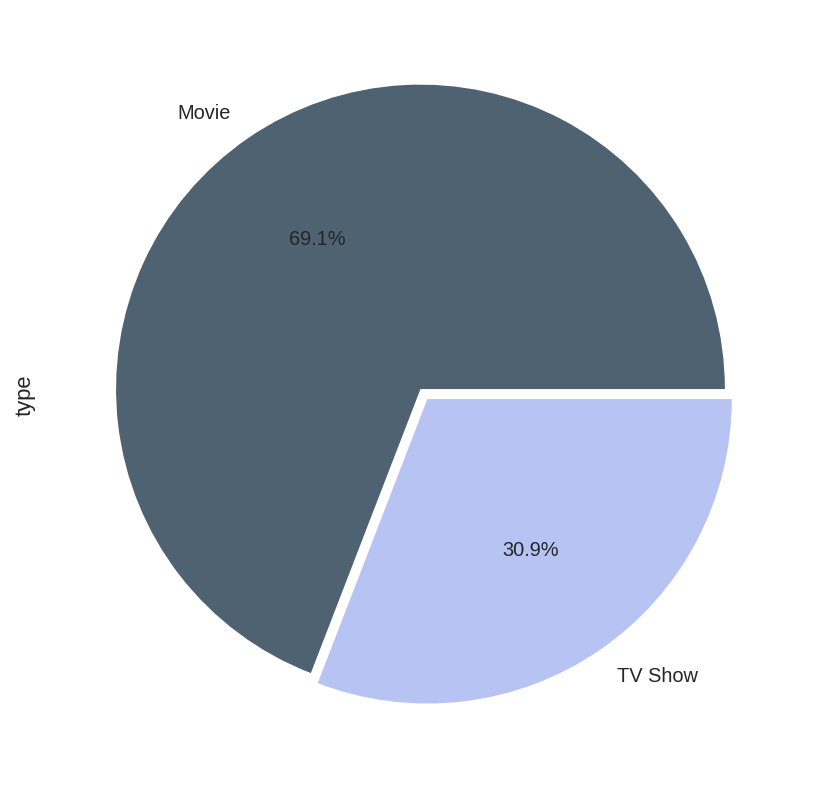

In [165]:
## checking count of content type present in data
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
Net_df['type'].value_counts().plot.pie( autopct = '%.1f%%',explode = [0.02,0.02],colors = colors, figsize=(15,7))

### **There are more number of Movies than TV shows on Netflix.The percentages are 69.1% for Movies and 30.9% for TV shows.**

# **Title**

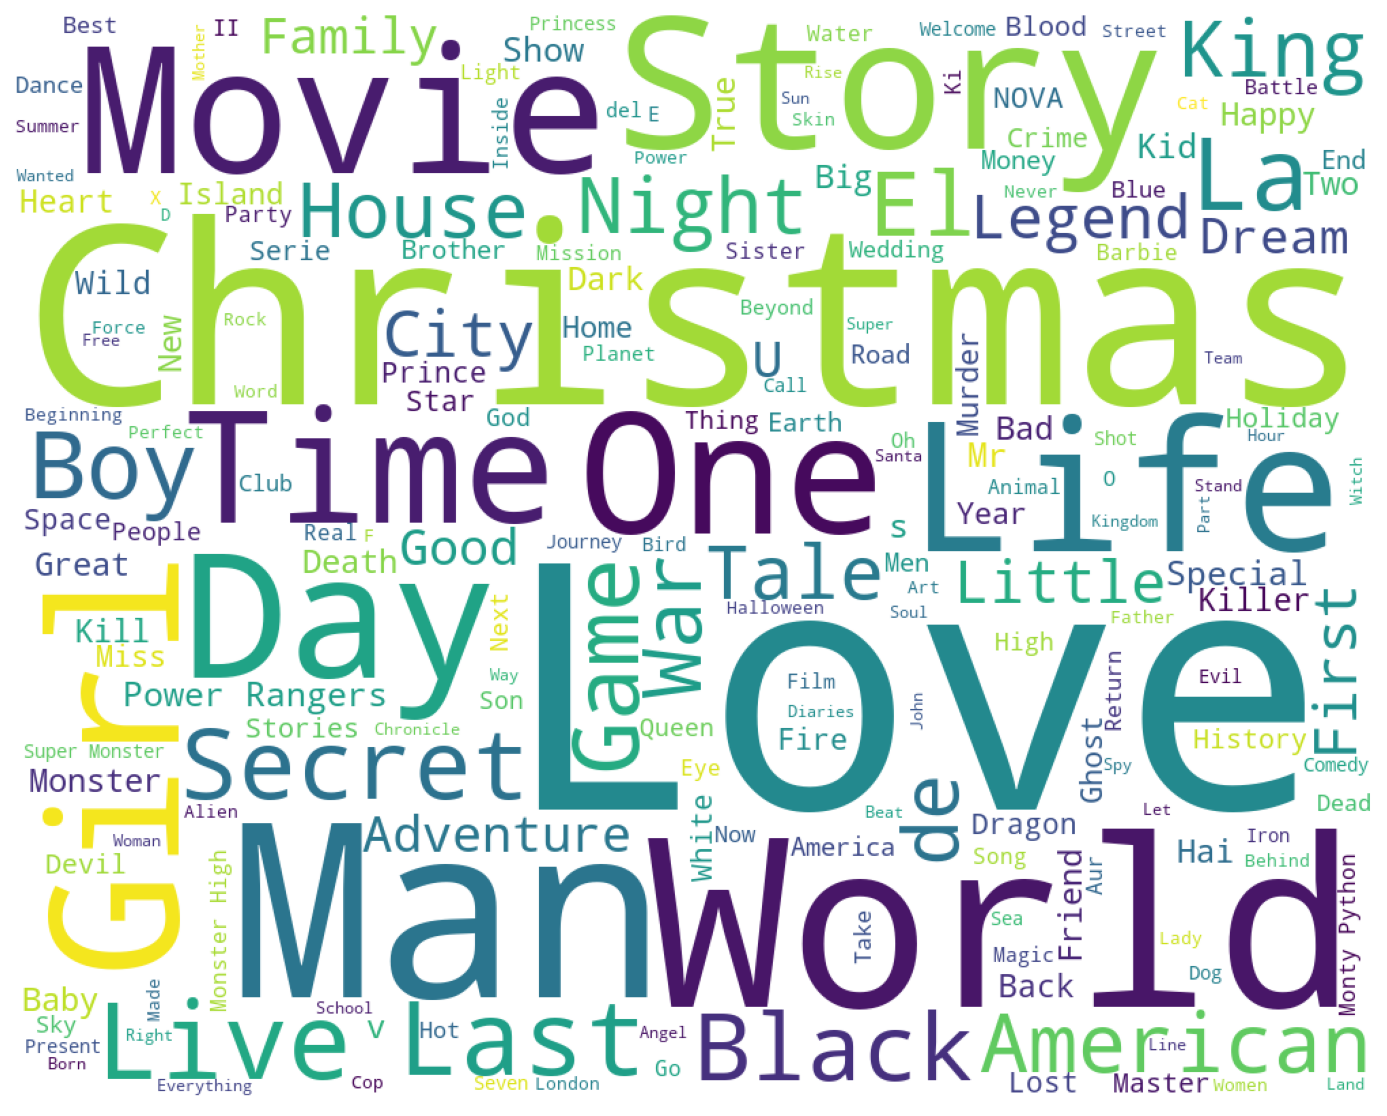

In [166]:
#Importing wordcloud
from wordcloud import WordCloud, STOPWORDS

#Most occurred word in title
plt.subplots(figsize=(20,10))
stopwords = set(STOPWORDS)
text = " ".join(Net_df.title)
wordcloud = WordCloud(stopwords=stopwords,background_color='white',width=1000,height=800).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### ** "chirstmas", "love", "world", "man" and "life" are few of the words which are used frequenctly in title of movies and Tv shows.**

# **DIRECTOR**

In [167]:
Net_df["director"].nunique()

4048

In [168]:
Net_df["director"].value_counts()

Unknown                   2376
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
                          ... 
Charles Officer              1
John Trengove                1
Jonathan Helpert             1
Jacob Schwab                 1
Sam Dunn                     1
Name: director, Length: 4048, dtype: int64

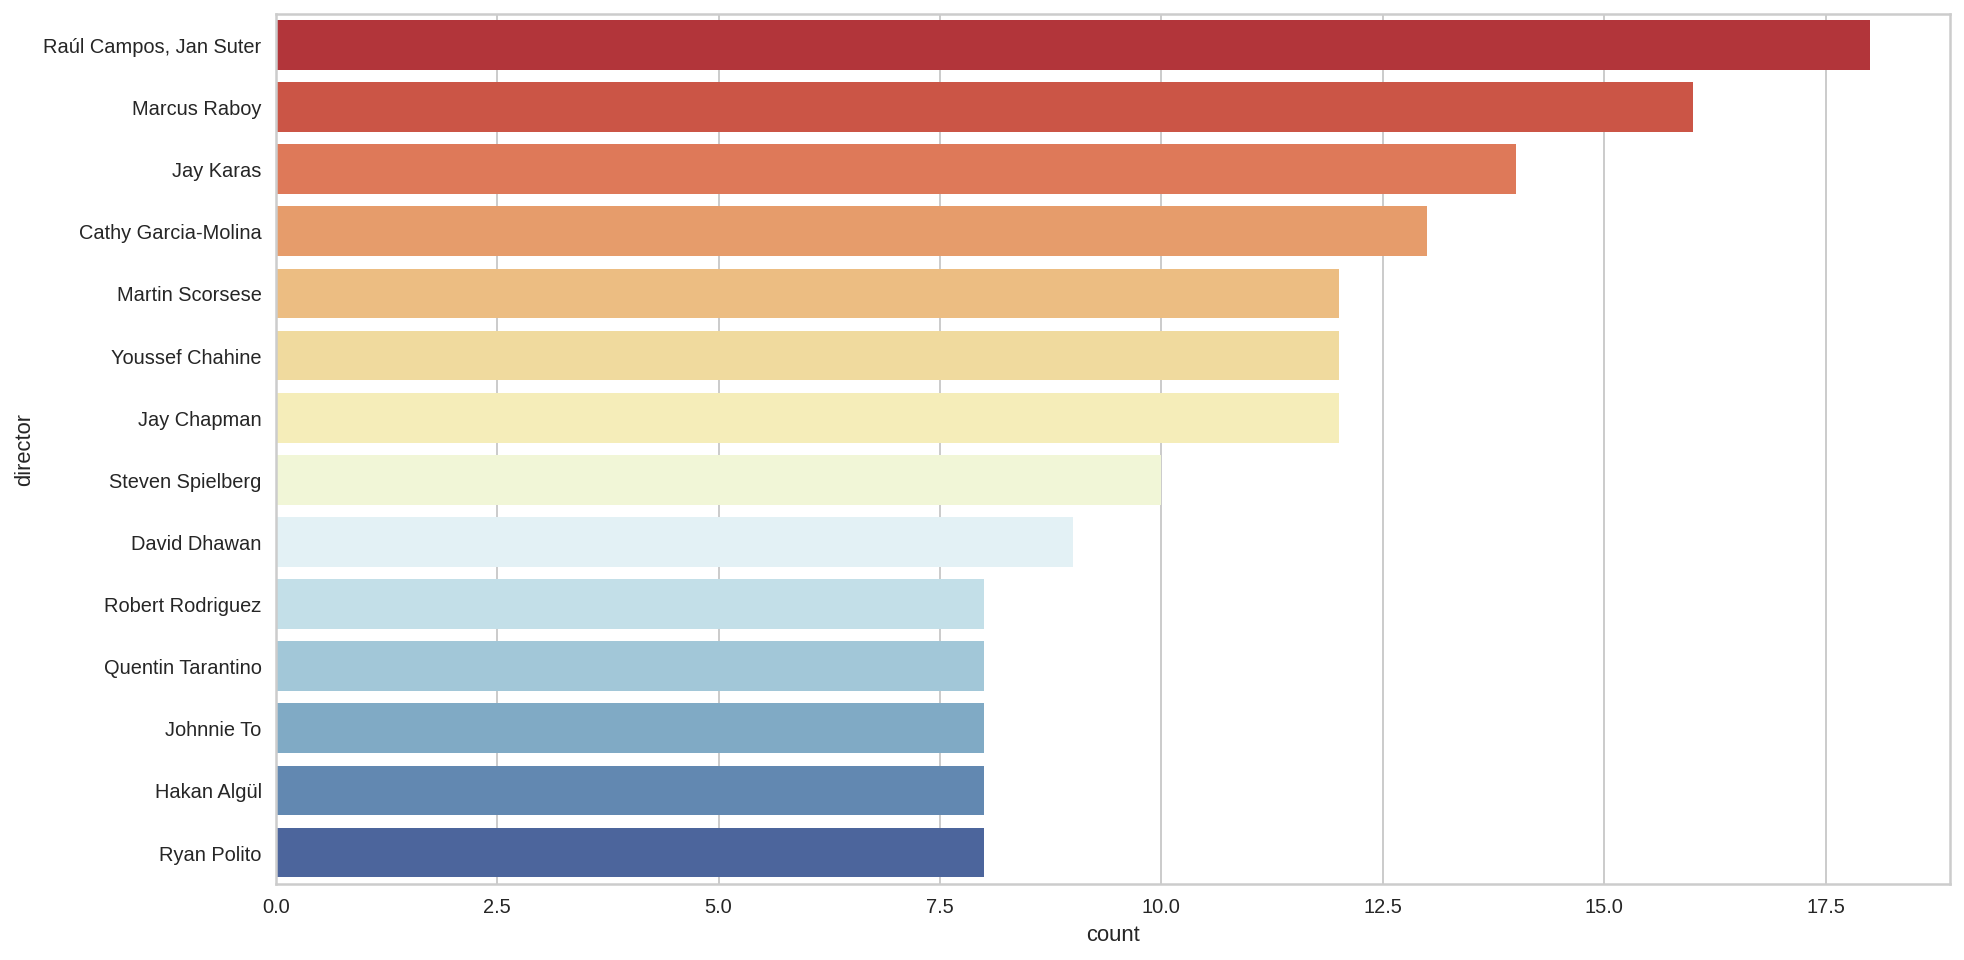

In [169]:
#ploting countplot 
plt.figure(figsize=(15,8))
sns.countplot(y =Net_df['director'], data = Net_df , palette="RdYlBu", order=Net_df['director'].value_counts().index[1:15] )

Raul Campos and Jan Sulter collectively have the most content on Netflix.

# **COUNTRY**

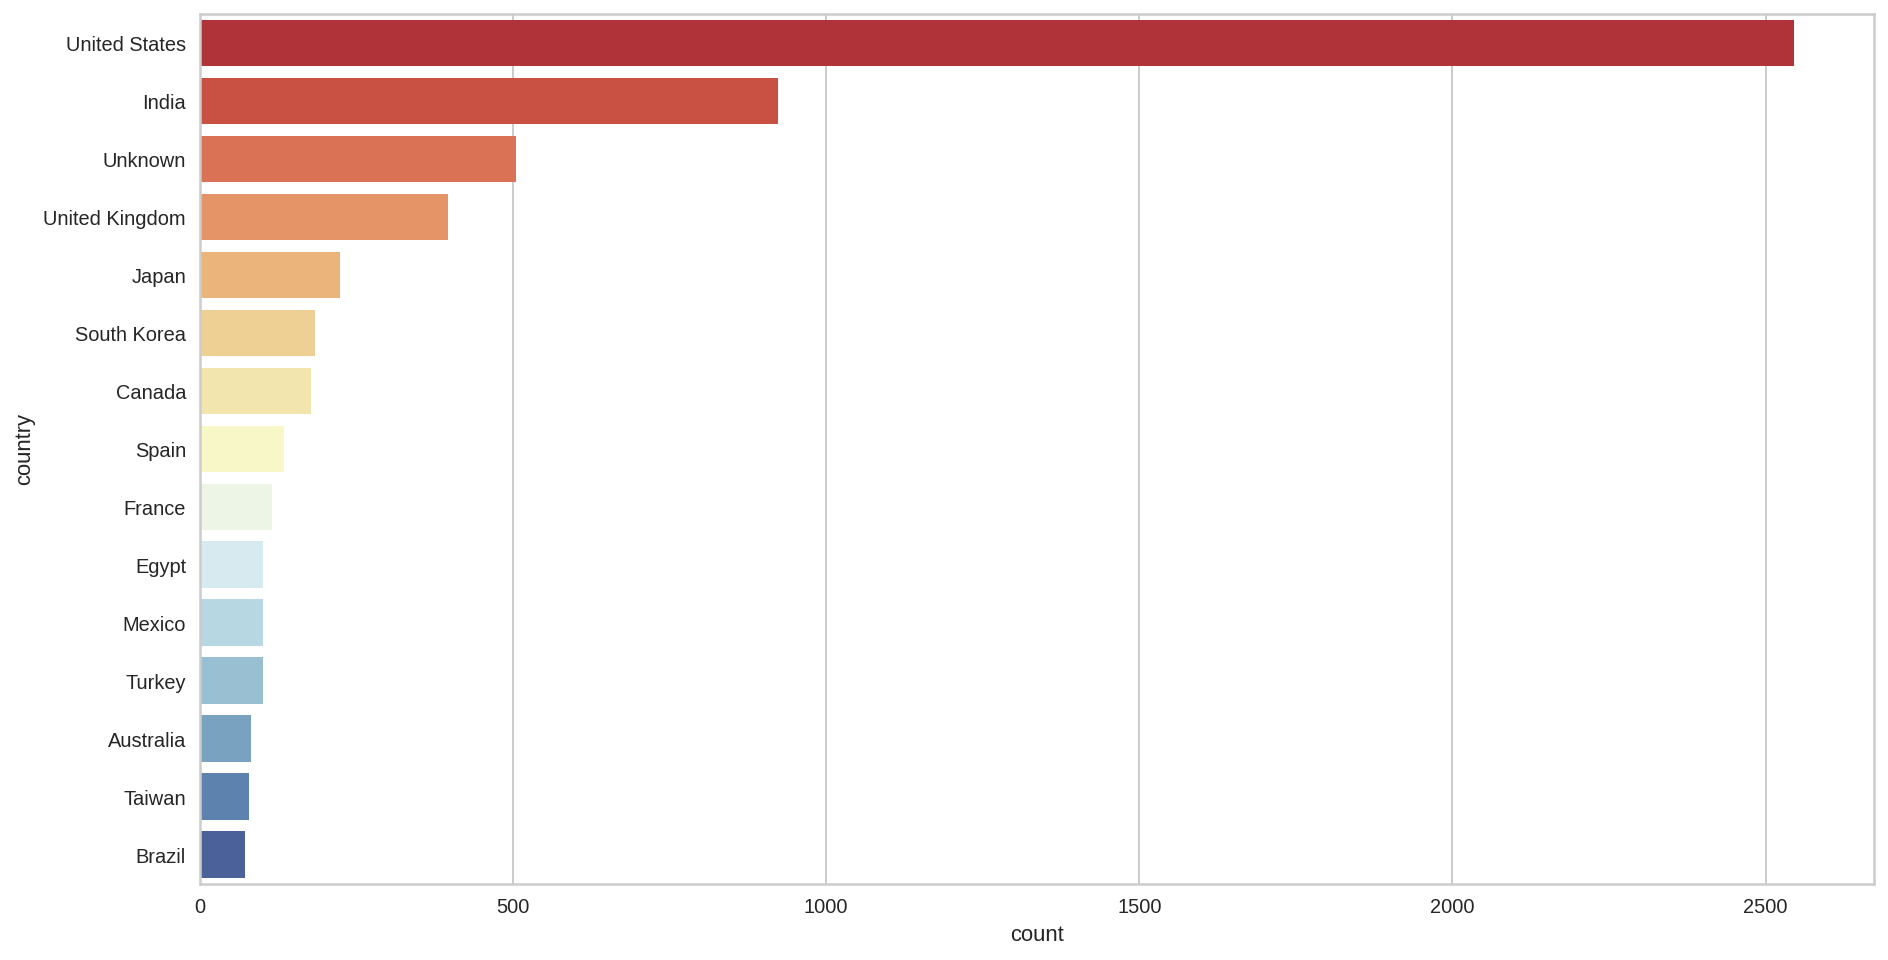

In [170]:
#ploting countplot 
plt.figure(figsize=(15,8))
sns.countplot(y =Net_df['country'], data = Net_df , palette="RdYlBu", order=Net_df['country'].value_counts().index[0:15] )

The United States has the most number of content on Netflix by a huge margin followed by India.

# **RATING**

In [171]:
Net_df["rating"].nunique()

14

In [172]:
Net_df["rating"].value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [173]:
rename_rating = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

Net_df['rating'] = Net_df['rating'].replace(to_replace = rename_rating)
Net_df['rating'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

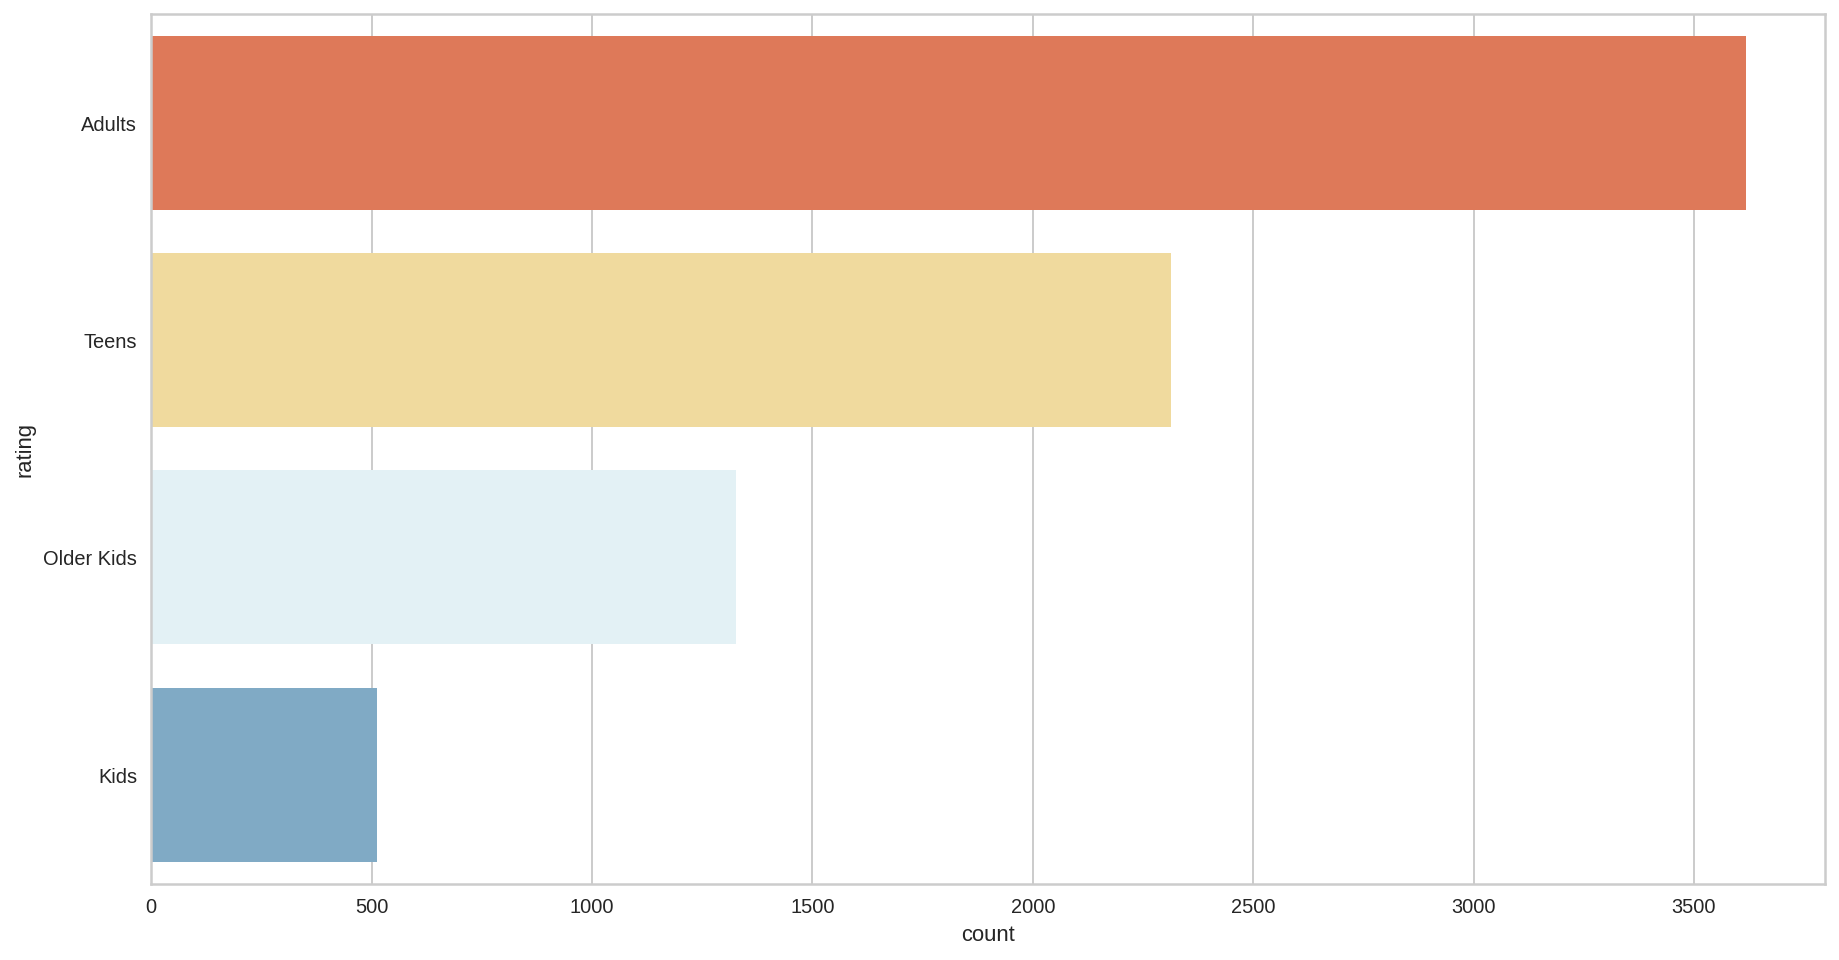

In [174]:
#ploting countplot 
plt.figure(figsize=(15,8))
sns.countplot(y =Net_df['rating'], data = Net_df , palette="RdYlBu", )

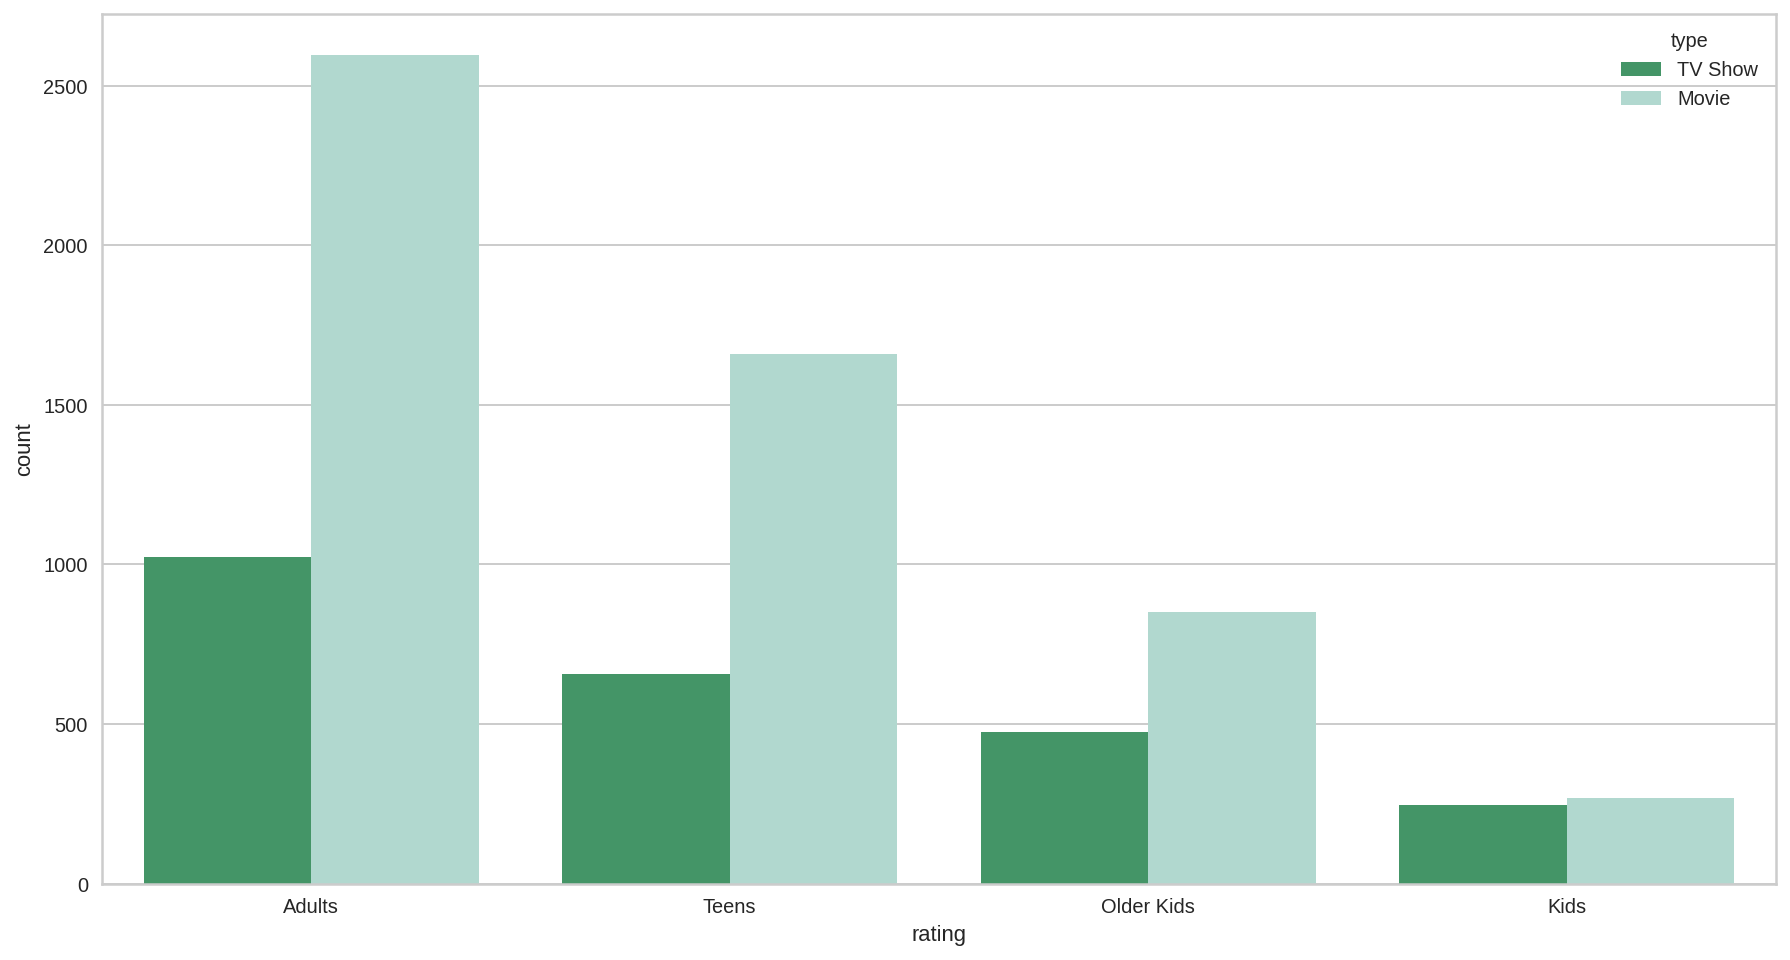

In [175]:
#ploting countplot 
plt.figure(figsize=(15,8))
ax = sns.countplot(data = Net_df , x = Net_df['rating'],palette = 'BuGn_r', hue = Net_df['type'],)

Most of the content made are for adult followed by teens.

# **year_added**

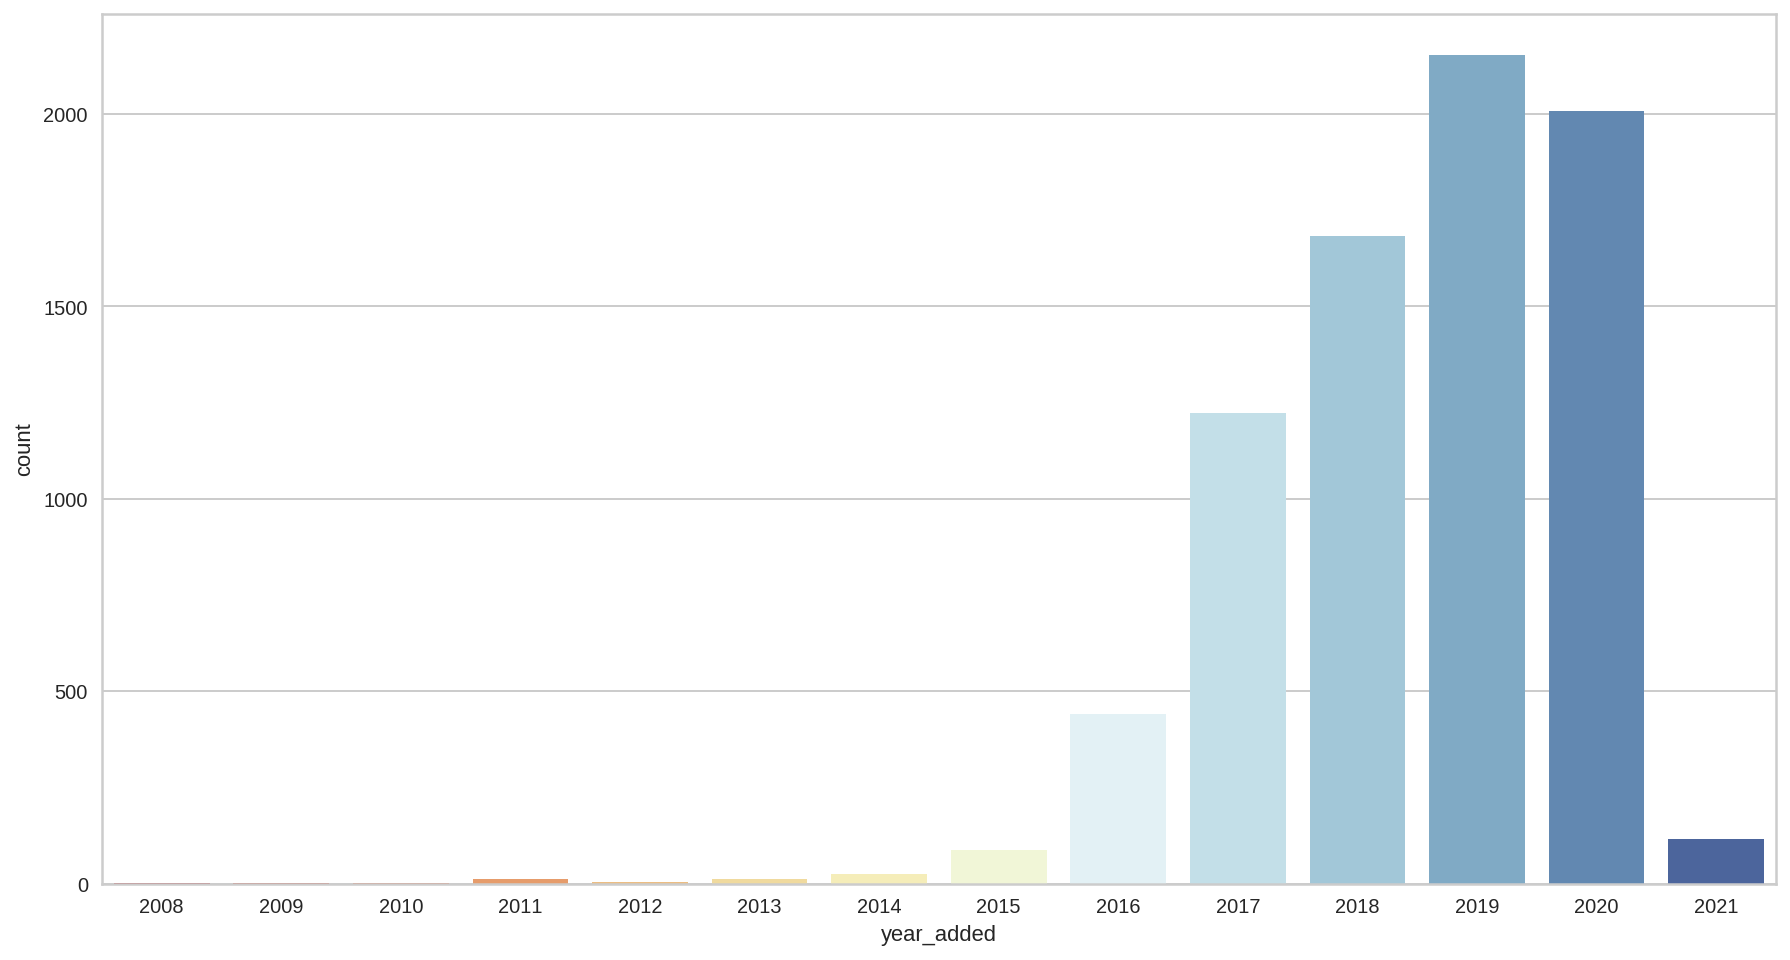

In [176]:
#ploting countplot 
plt.figure(figsize=(15,8))
sns.countplot(x =Net_df['year_added'], data = Net_df , palette="RdYlBu", )

The number of release have significantly increased after 2015 and have dropped in 2021 because of Covid 19

# **month_added**

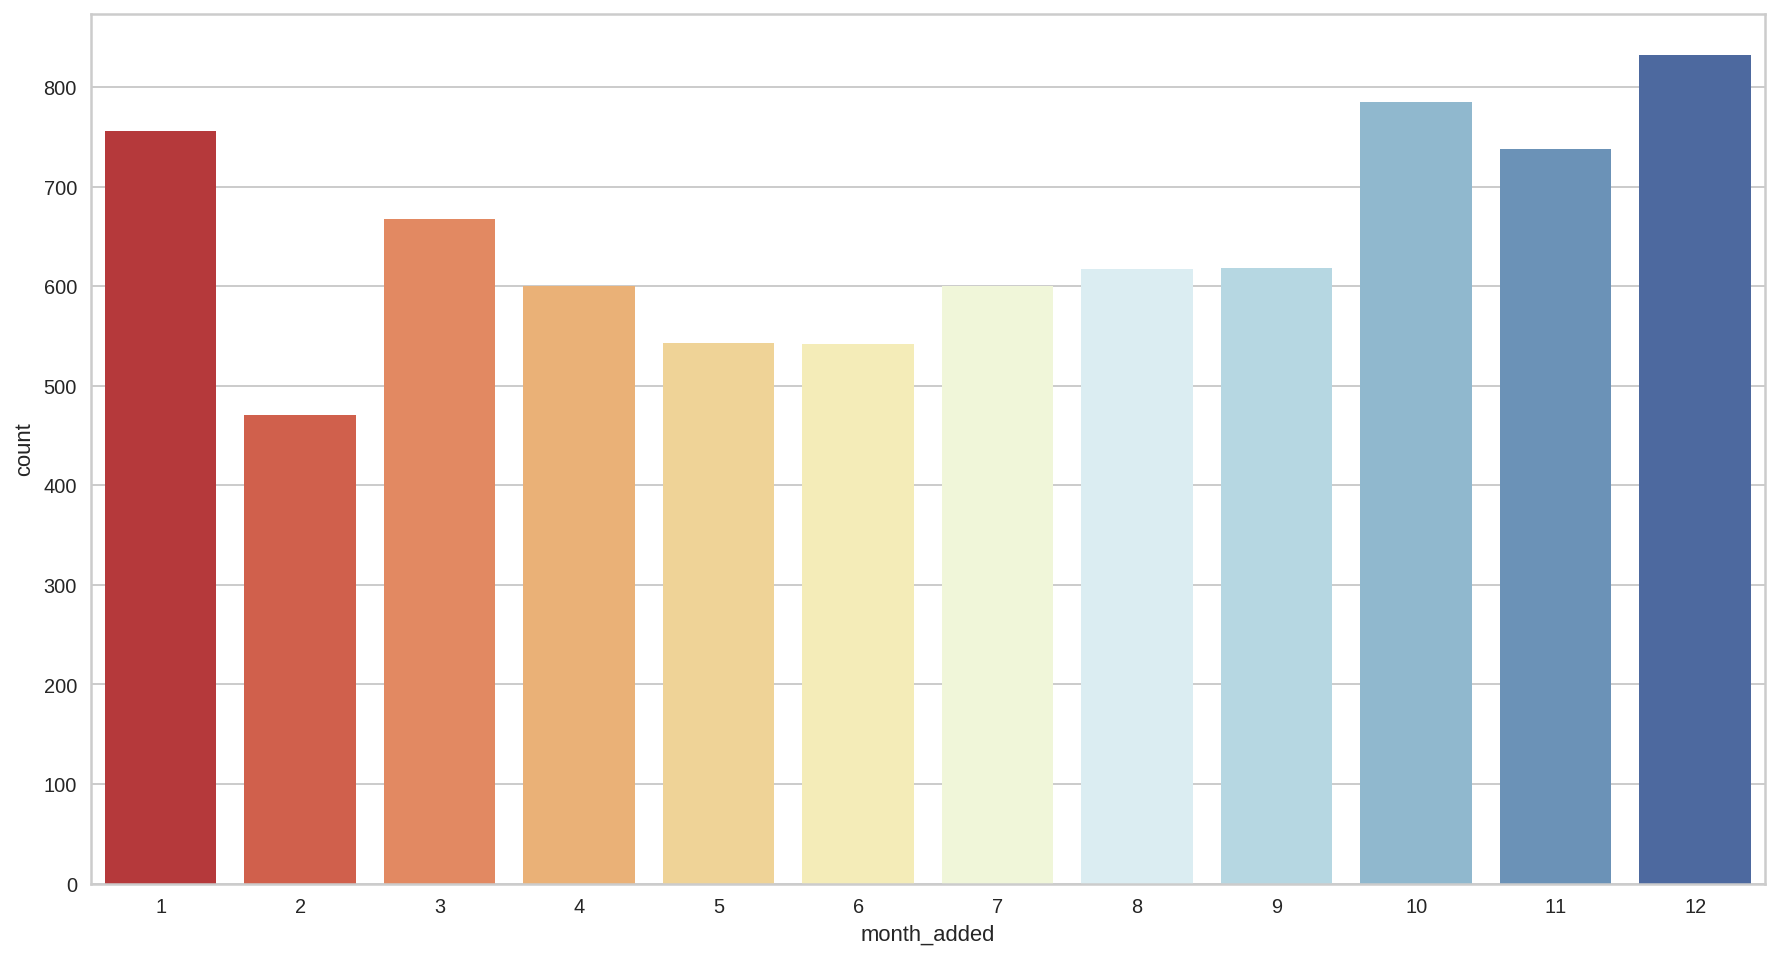

In [177]:
#ploting countplot 
plt.figure(figsize=(15,8))
sns.countplot(x =Net_df['month_added'], data = Net_df , palette="RdYlBu", )


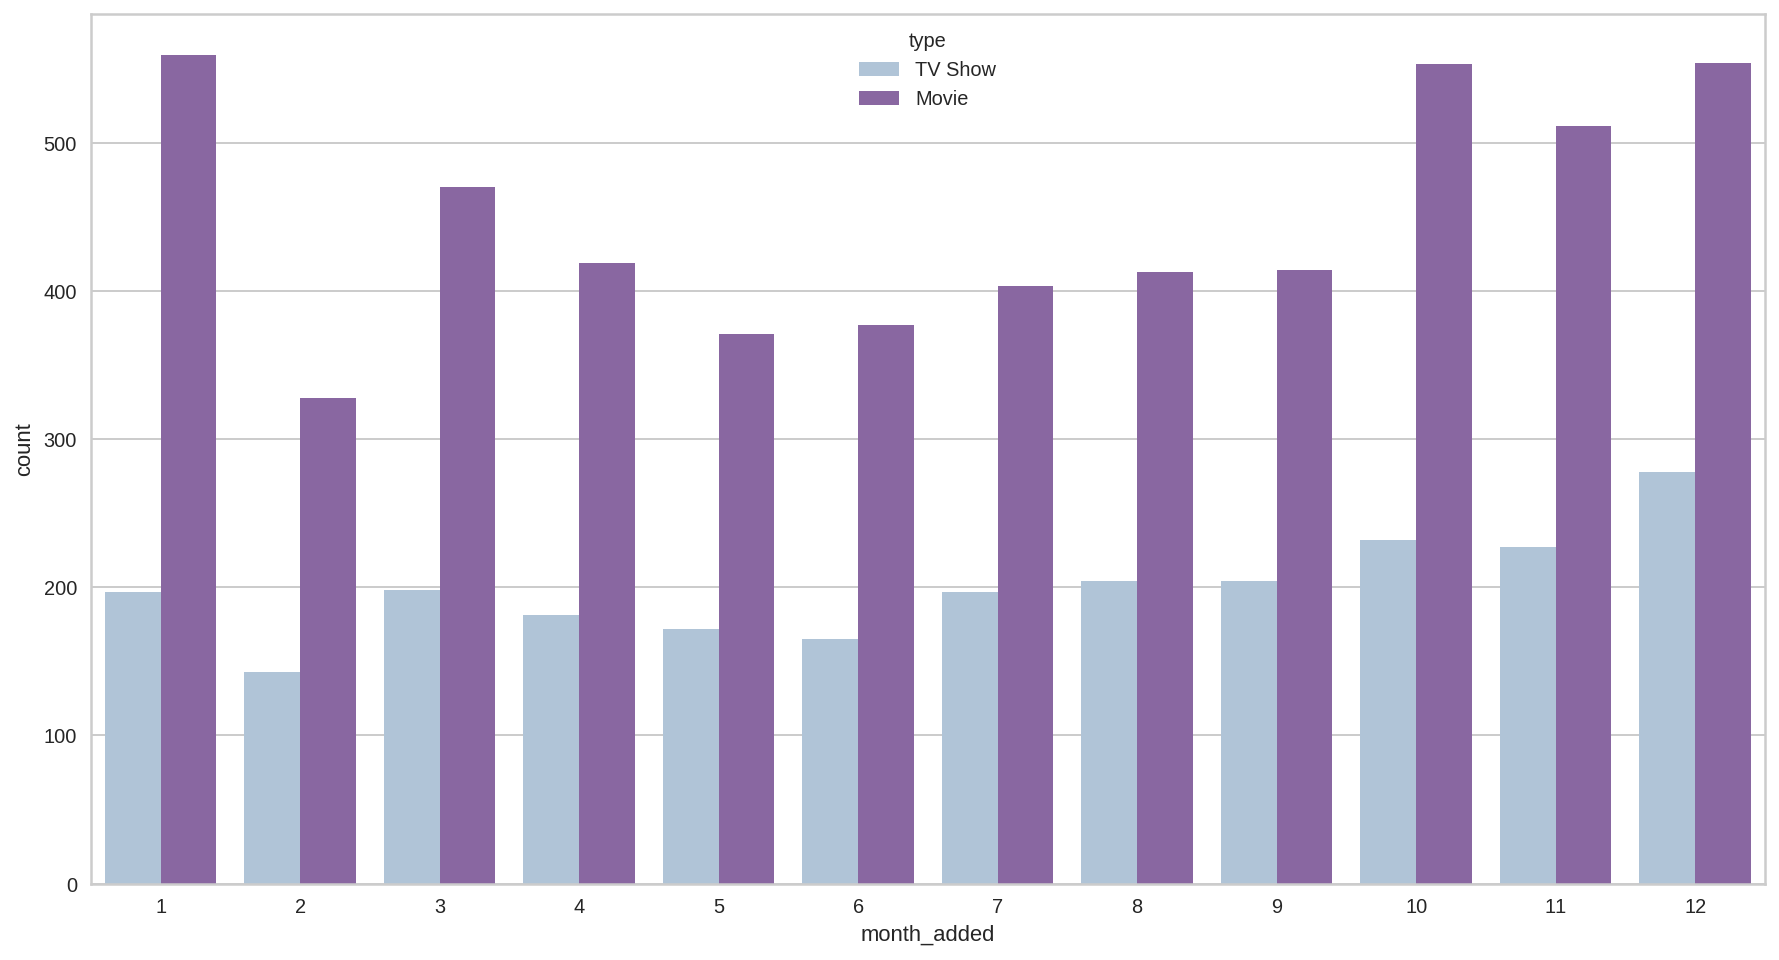

In [178]:
#ploting countplot 
plt.figure(figsize=(15,8))
sns.countplot(x=Net_df['month_added'],palette="BuPu",hue=Net_df['type'])

More of the content is released in holiday season - October, November, December and January

# **DURATION**

### **Movie Duration**

In [179]:
movie_dur = Net_df.loc[Net_df['type'] == 'Movie',['type','duration']]  
movie_dur['duration'] = movie_dur['duration'].apply(lambda x : int(x.split()[0]))

Text(0.5, 1.0, 'Movie Duration')

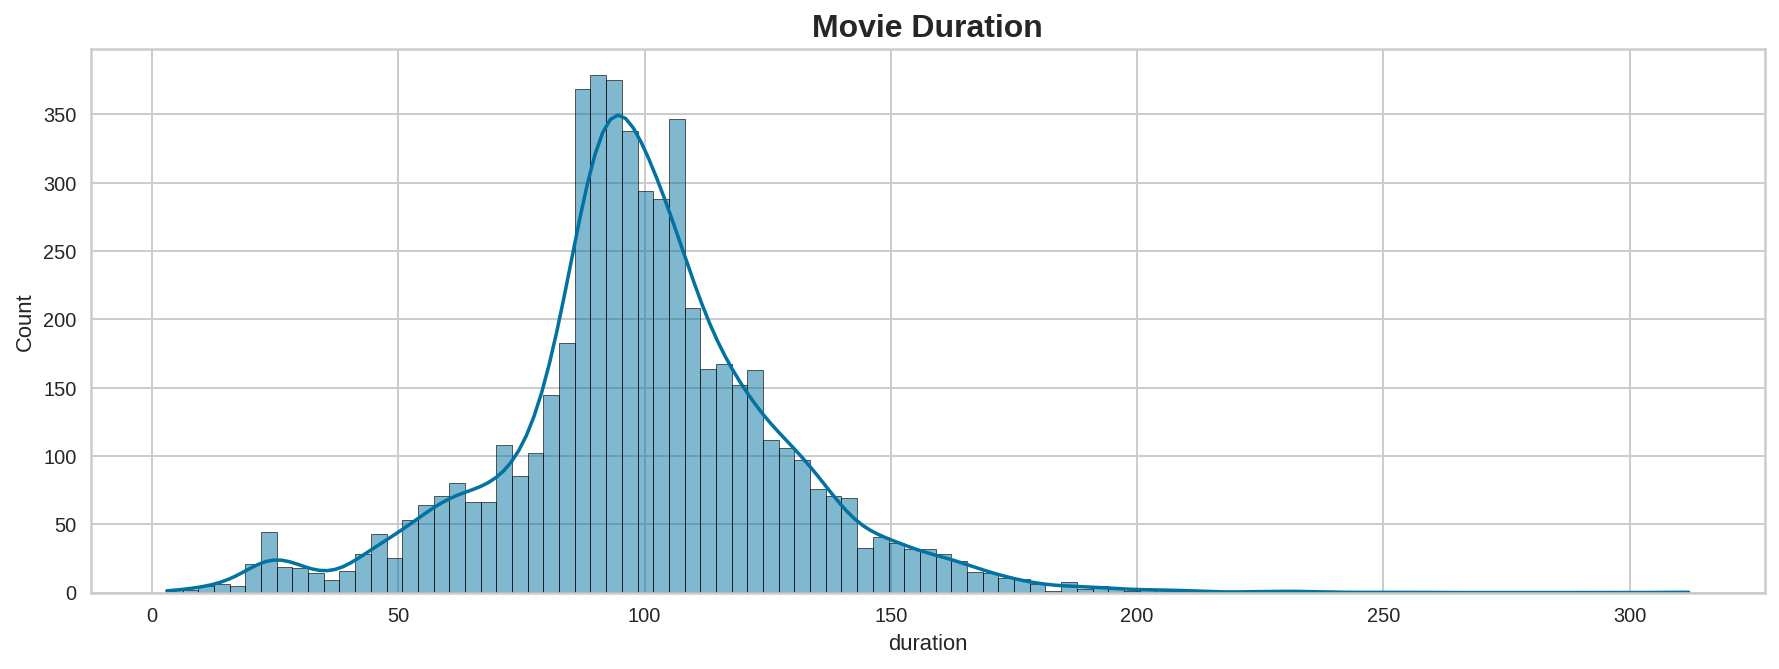

In [180]:
#movie lenth distribution
plt.figure(figsize=(15,5))
ax = sns.histplot(x='duration',data=movie_dur,kde=True,)
plt.title("Movie Duration",size='16',fontweight="bold")

### **TV Show Duration**

In [181]:
Net_df.duration[Net_df['type'] == 'TV Show'].value_counts()

1 Season      1606
2 Seasons      378
3 Seasons      183
4 Seasons       86
5 Seasons       57
6 Seasons       30
7 Seasons       19
8 Seasons       18
9 Seasons        8
10 Seasons       5
11 Seasons       2
12 Seasons       2
15 Seasons       2
13 Seasons       1
16 Seasons       1
Name: duration, dtype: int64

In [182]:
TV_Show_dur = Net_df.loc[Net_df['type'] == 'TV Show',['type','duration']]

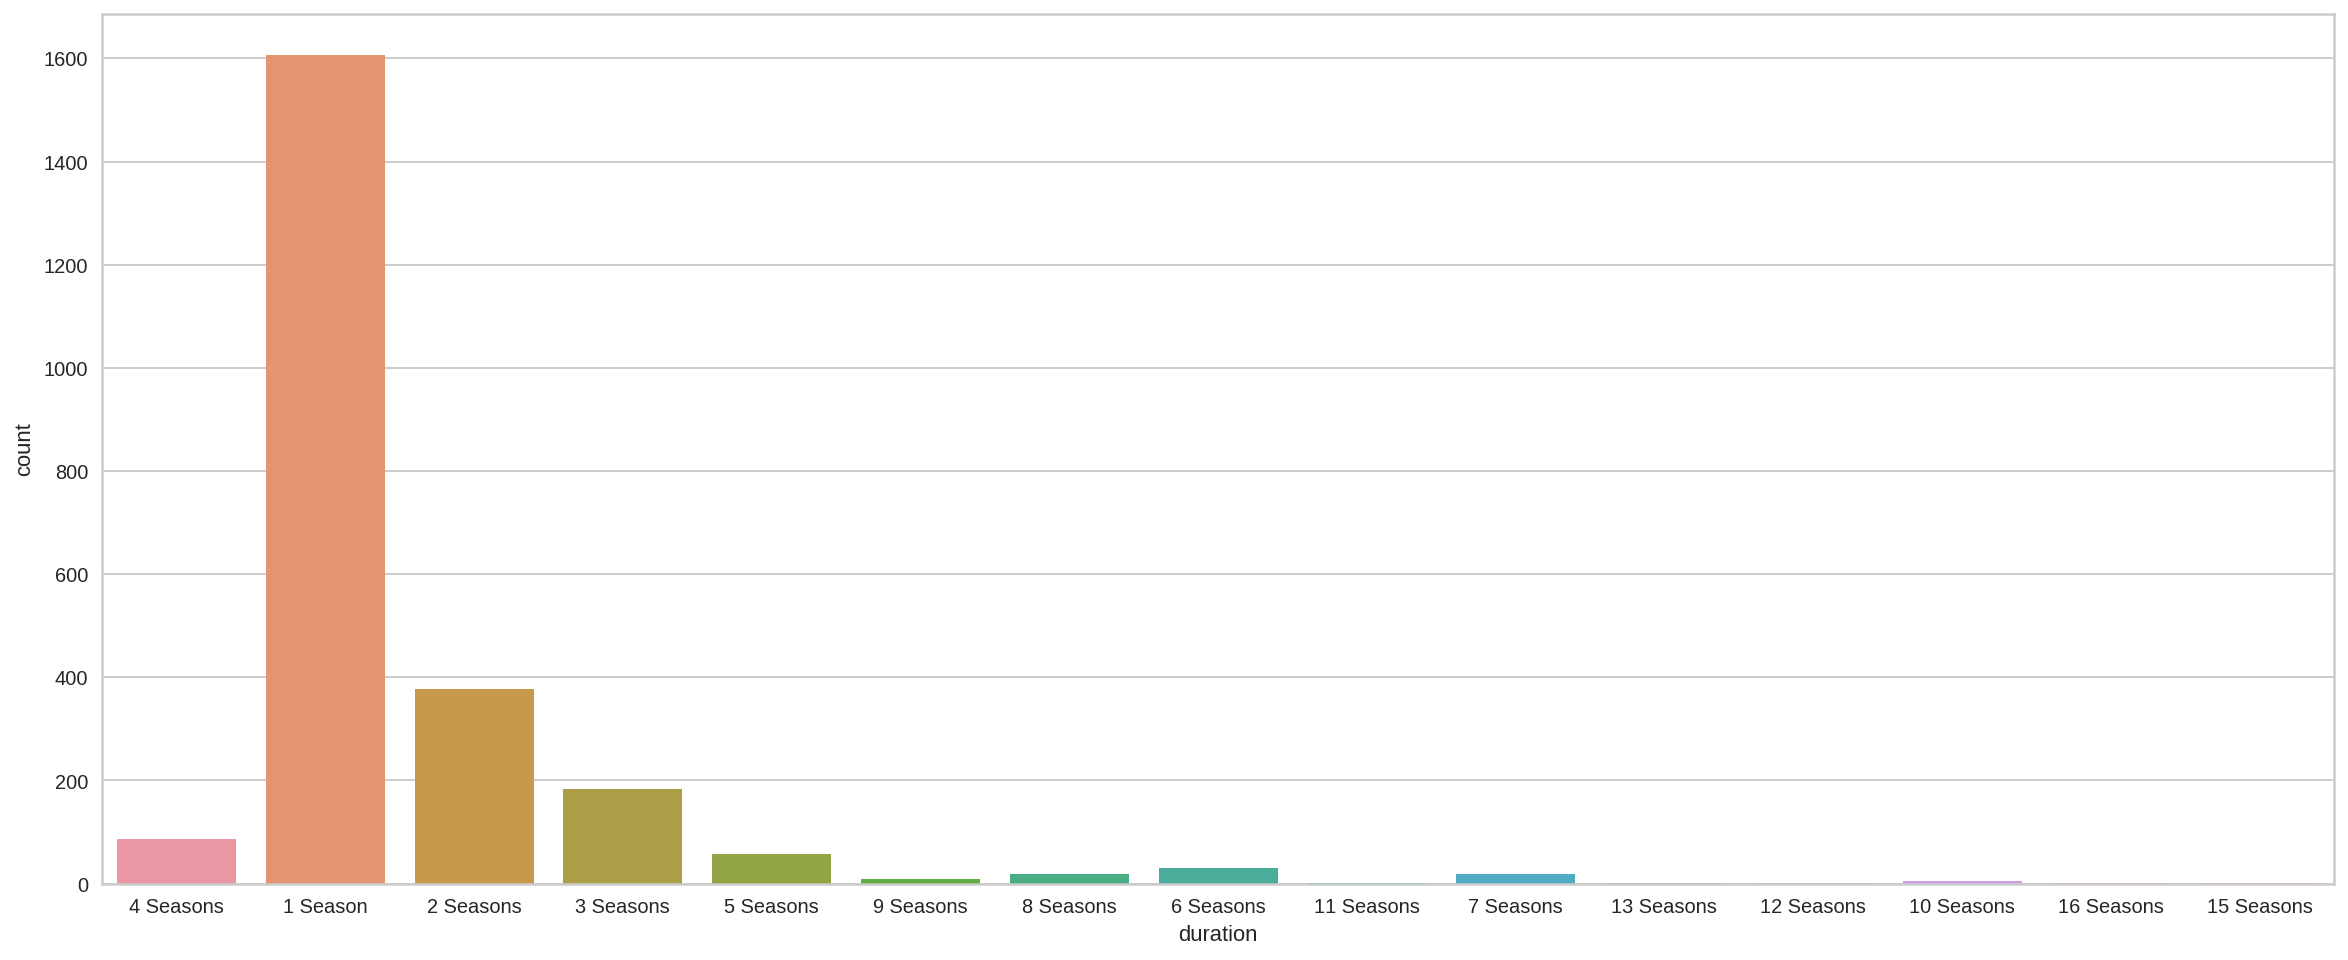

In [183]:
#ploting countplot 
plt.figure(figsize=(20,8))
sns.countplot(x=TV_Show_dur['duration'])

# **Genres**

In [184]:
Net_df['genres'].value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: genres, Length: 491, dtype: int64

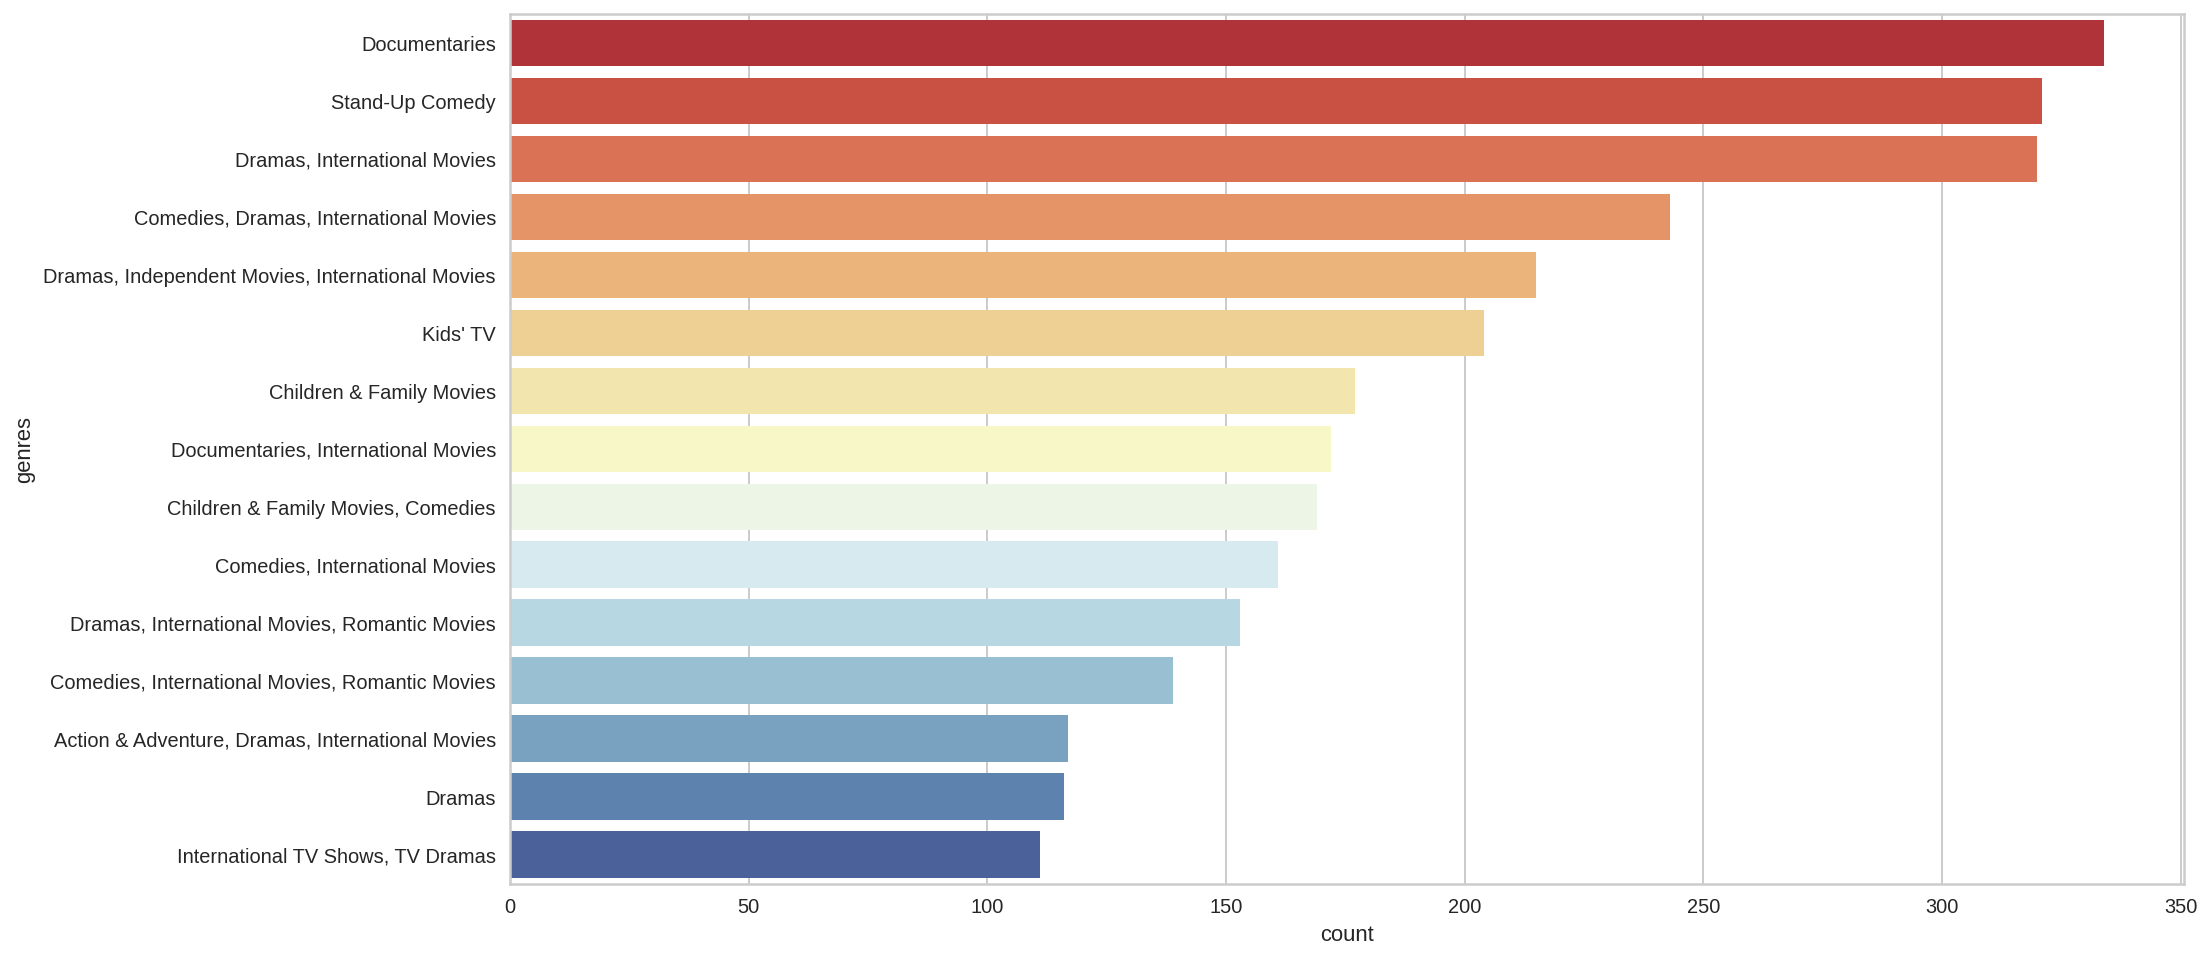

In [185]:
plt.figure(figsize=(15,8))
sns.countplot(y =Net_df['genres'], data = Net_df , palette="RdYlBu", order=Net_df['genres'].value_counts().index[0:15] )

From the graph, we know that Documentaries take the first place, followed by Stand-up Comedy and Dramas,International Movies

In [186]:
genres_df = Net_df.copy()

In [187]:
genres_df['genres'] = genres_df['genres'].apply(lambda x : x.split(','))             #splitting into list

In [188]:

list_genre = []
for i in genres_df['genres']:
  list_genre +=i                                                                     

for i in range(len(list_genre)): 
  list_genre[i] = list_genre[i].strip()

genres_dict = {}
for genre in  list_genre:
  if genre in genres_dict:
    genres_dict[genre] +=1
  else:
    genres_dict[genre] = 1

genres_dict = dict(sorted(genres_dict.items(), key=lambda item: item[1],reverse=True))

In [189]:
print(genres_dict)

{'International Movies': 2437, 'Dramas': 2105, 'Comedies': 1471, 'International TV Shows': 1197, 'Documentaries': 786, 'Action & Adventure': 721, 'TV Dramas': 703, 'Independent Movies': 673, 'Children & Family Movies': 532, 'Romantic Movies': 531, 'TV Comedies': 517, 'Thrillers': 491, 'Crime TV Shows': 426, "Kids' TV": 411, 'Docuseries': 352, 'Romantic TV Shows': 333, 'Stand-Up Comedy': 329, 'Music & Musicals': 321, 'Horror Movies': 312, 'British TV Shows': 231, 'Reality TV': 222, 'Sci-Fi & Fantasy': 218, 'Sports Movies': 196, 'Korean TV Shows': 150, 'TV Action & Adventure': 149, 'Anime Series': 146, 'Spanish-Language TV Shows': 146, 'Classic Movies': 103, 'TV Mysteries': 90, 'LGBTQ Movies': 90, 'Science & Nature TV': 85, 'TV Sci-Fi & Fantasy': 75, 'TV Horror': 69, 'Teen TV Shows': 60, 'Cult Movies': 59, 'Faith & Spirituality': 57, 'Anime Features': 57, 'Movies': 52, 'Stand-Up Comedy & Talk Shows': 52, 'TV Thrillers': 50, 'Classic & Cult TV': 25, 'TV Shows': 12}


In [190]:
#new = pd.DataFrame.from_dict(genres_dict,columns=['genres', 'count'])
df = pd.DataFrame(list(genres_dict.items()), columns = ['Name','Value'])

In [191]:
print(df)

                            Name  Value
0           International Movies   2437
1                         Dramas   2105
2                       Comedies   1471
3         International TV Shows   1197
4                  Documentaries    786
5             Action & Adventure    721
6                      TV Dramas    703
7             Independent Movies    673
8       Children & Family Movies    532
9                Romantic Movies    531
10                   TV Comedies    517
11                     Thrillers    491
12                Crime TV Shows    426
13                      Kids' TV    411
14                    Docuseries    352
15             Romantic TV Shows    333
16               Stand-Up Comedy    329
17              Music & Musicals    321
18                 Horror Movies    312
19              British TV Shows    231
20                    Reality TV    222
21              Sci-Fi & Fantasy    218
22                 Sports Movies    196
23               Korean TV Shows    150


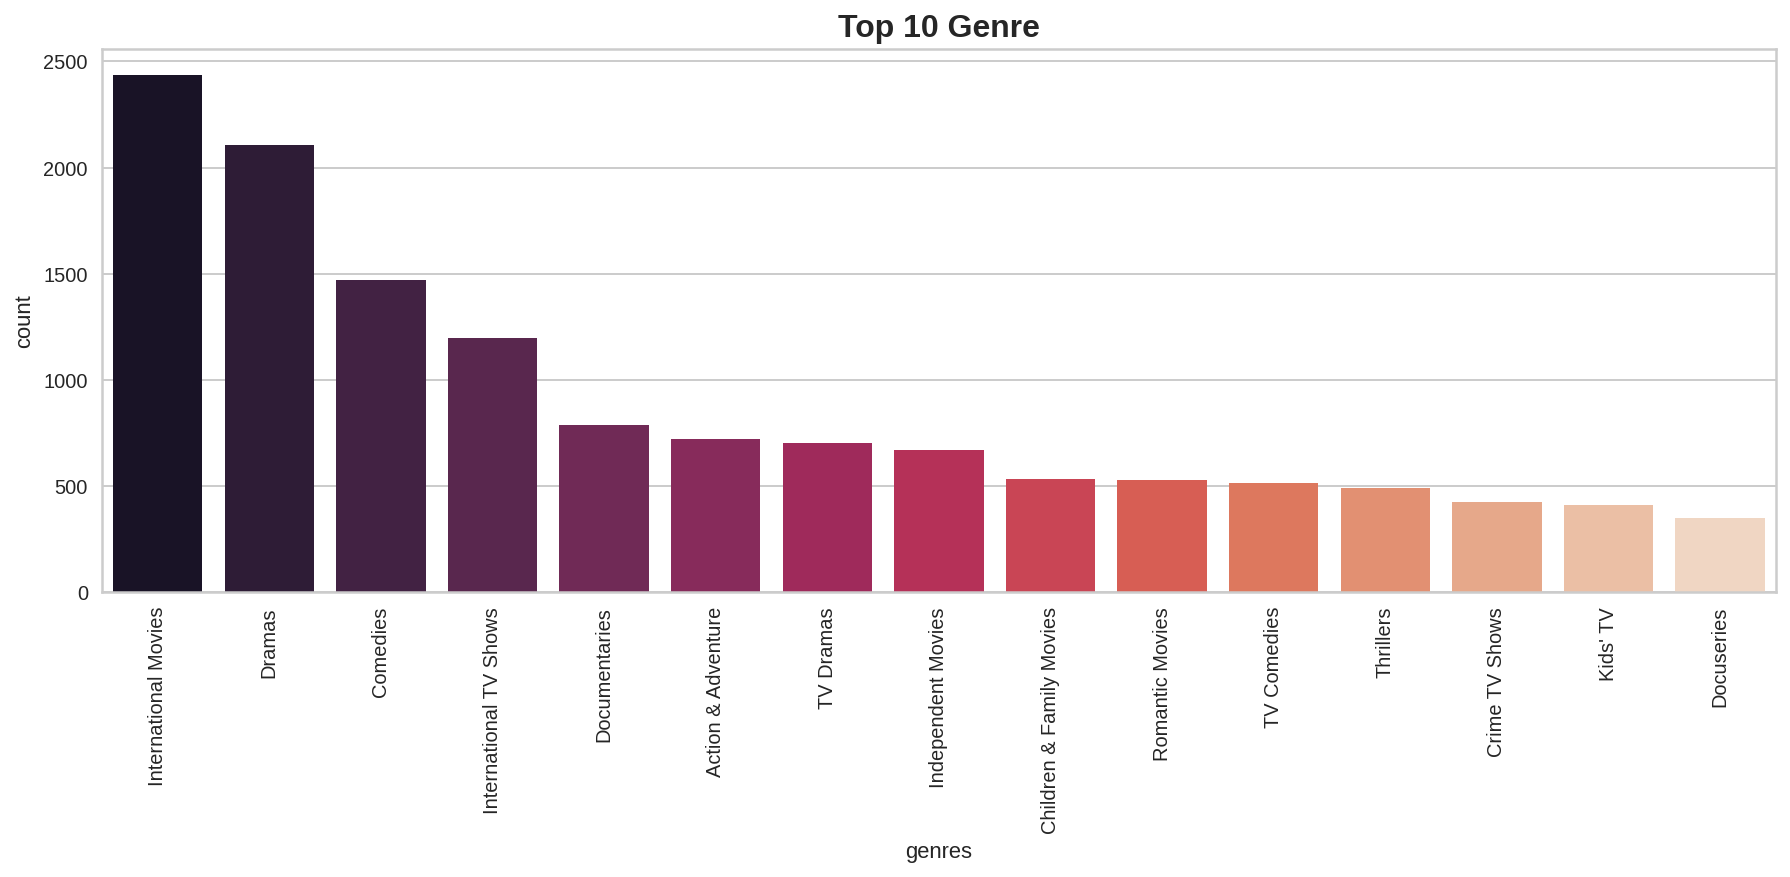

In [192]:
#Top 15 genres on netflix
df_genre_count = pd.DataFrame(genres_dict.values(),genres_dict.keys()).reset_index().rename(columns={'index':'genres', 0:'count'})[0:15]
plt.figure(figsize=(15,5))
sns.barplot(x='genres',y='count',data=df_genre_count,palette="rocket")
plt.title("Top 10 Genre",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

International movies,Drama and Comredy are top genre on Netflix platform. 


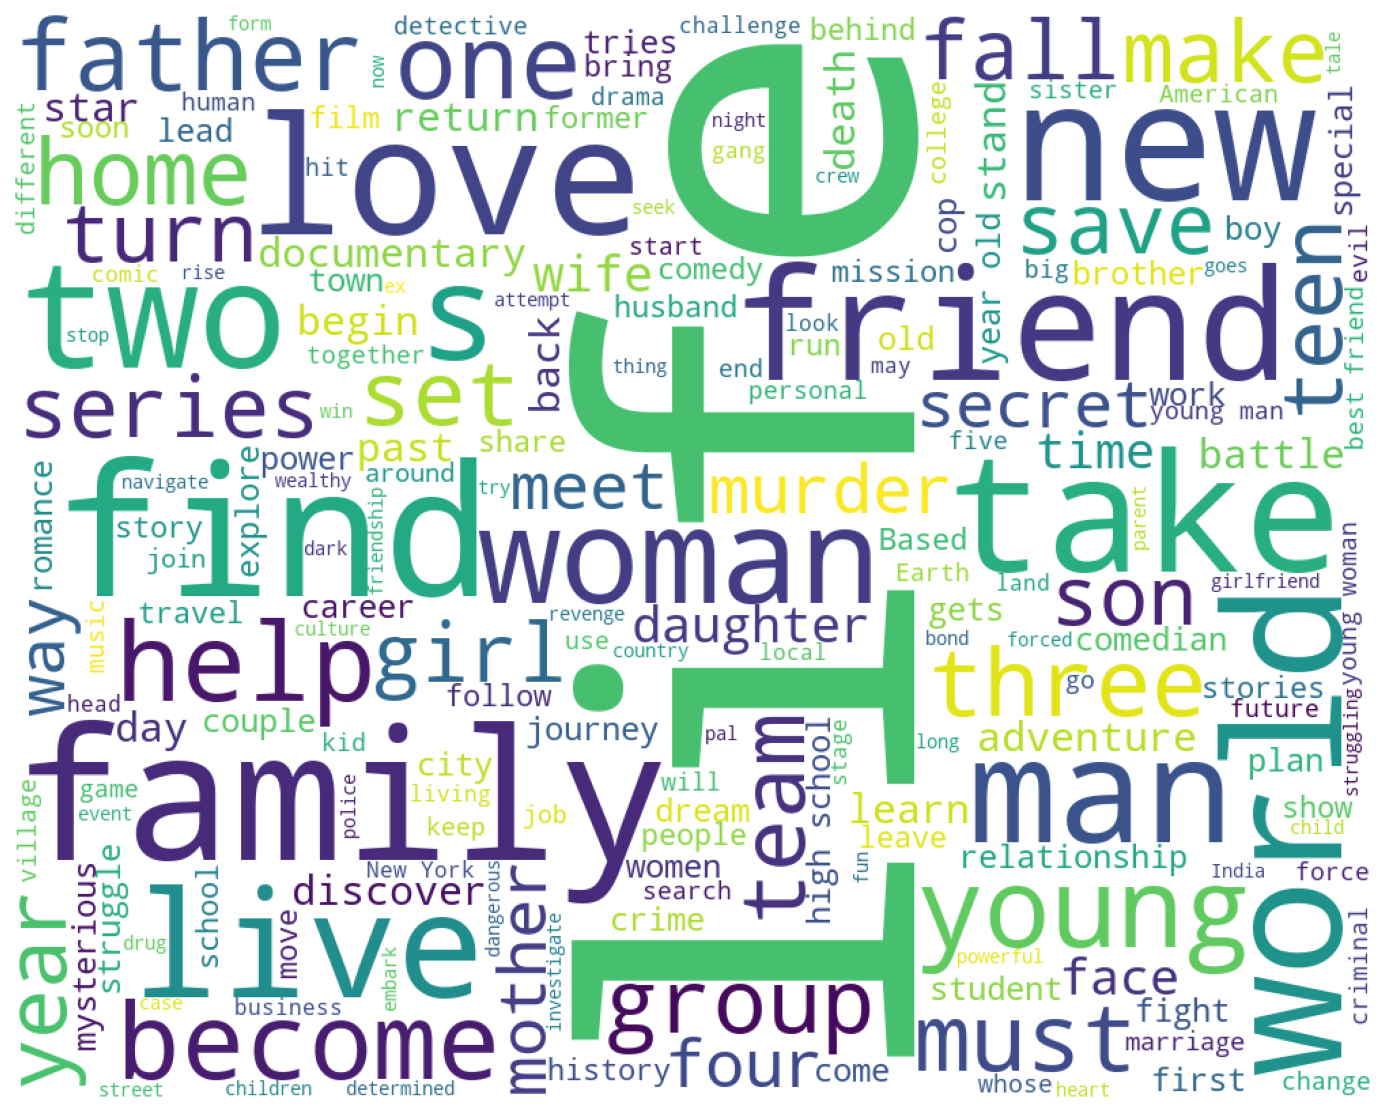

In [193]:
#Most occurred word in title
plt.subplots(figsize=(20,10))
text=" ".join(Net_df.description)
wordcloud = WordCloud(background_color='white',width=1000,height=800).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# **Understanding what type content is available in different countries**

In [194]:
#spliting country name, where 2 or more countries are stated.
Net_df.country = Net_df.country.str.split(',')
Net_df.loc[:, 'country'] = Net_df.country.map(lambda x: x[0])

In [195]:
#total no of unique country name 
Net_df['country'].nunique()

82

In [196]:
Net_df['country'].value_counts()

United States     2874
India              956
United Kingdom     576
Unknown            505
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

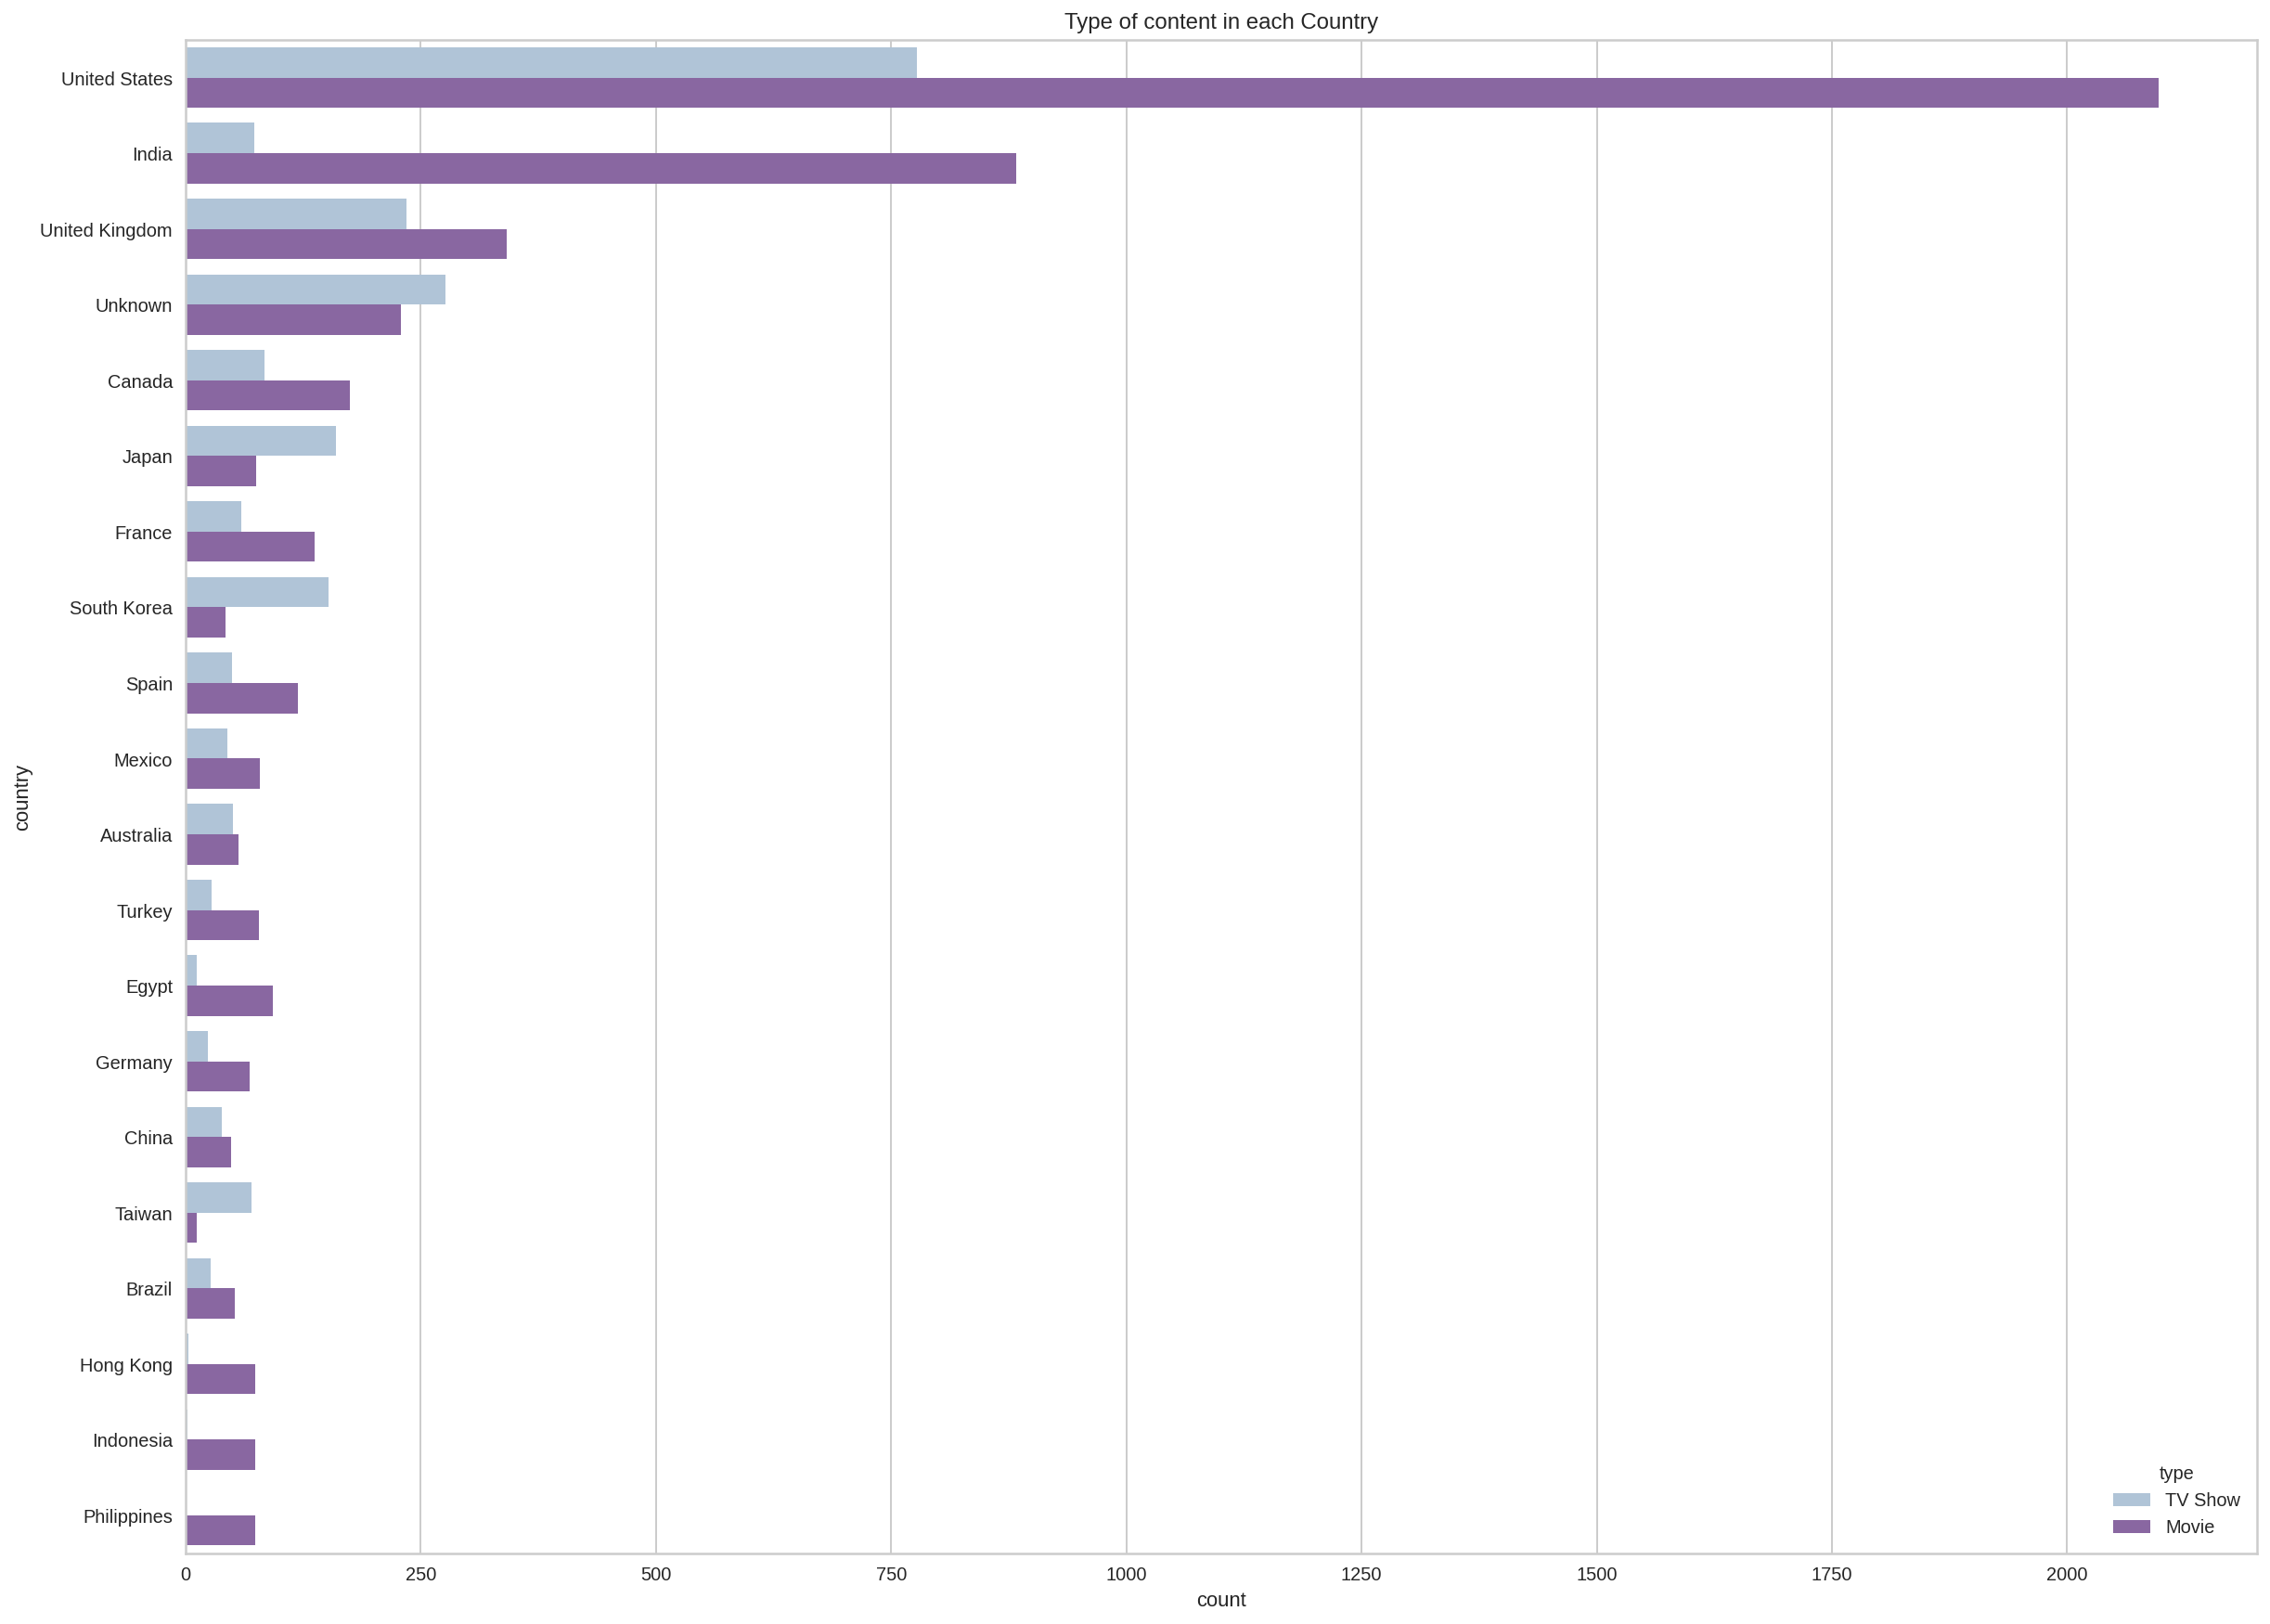

In [197]:
#type of content in top 20 countries 
plt.figure(figsize=(20,15))
sns.countplot(y=Net_df['country'],palette="BuPu",order=Net_df['country'].value_counts().index[0:20],hue=Net_df['type'])
plt.title("Type of content in each Country")
plt.show()

Most of the countries have more movies than TV shows but for South Korea and Japan it's the opposite. It maybe because KDramas and Anime are more popular in these two countries respectively.

The influence of  Bollywood in India explains  the type of content available,  and perhaps the main focus  of this industry is Movies  and not TV Shows.

# **Is Netflix has increasingly focusing on TV rather than movies in recent years ?**


Analysis entire Netflix dataset consisting of both movies and shows. Let’s compare the total number of movies and shows released over the year  in this dataset to know which one is the majority.

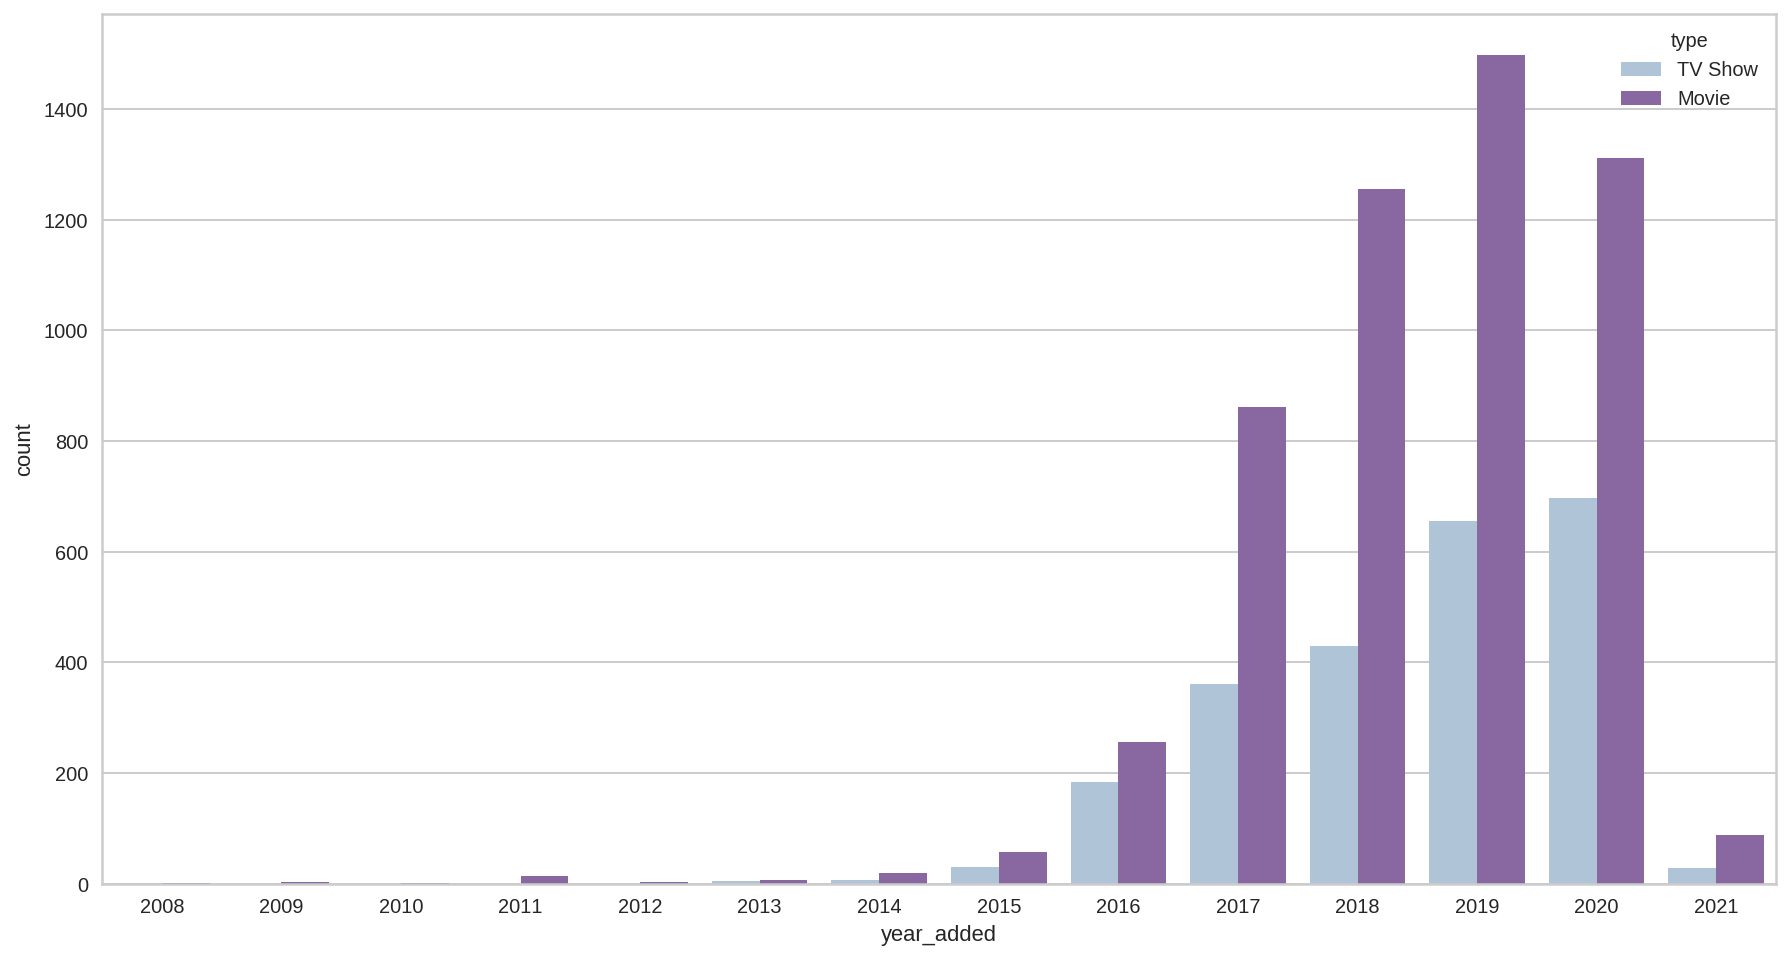

In [198]:
plt.figure(figsize=(15,8))
sns.countplot(x=Net_df['year_added'],palette="BuPu",hue=Net_df['type'])

Till 2019 we can see there is gradual rise in both  movies and TV show but in 2020 we can see that is a bit drop in movies whereas the growth of TV shows remains the same.

So yes , Netflix is  increasingly focusing on TV rather than movies in recent years 

# **Clustering similar content by matching text-based features**

In [199]:
# combining textual columns
Net_df['combined_text'] = Net_df['genres'].astype(str) + " " + Net_df['description'].astype(str) + " " + Net_df['title'].astype(str) 

In [200]:
# function to change data to lowercase and perform pattern change

def textpattern(text):
  return re.sub(r"[^a-zA-Z ]","",str(text)).lower()

In [201]:
# converting to lower case and basic pattern change to clean data

Net_df['combined_text']= Net_df['combined_text'].apply(textpattern)

In [204]:
# stop words
from nltk.corpus import stopwords
stemmer = SnowballStemmer('english')
stopwords =set(stopwords.words('english'))
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [205]:
# function to perform stemming of the words and remove stop words

def filter(text, stopwords):
    cleaned = []
    tokens = word_tokenize(text) 
    for word in tokens:
        if word not in stopwords:
            cleaned.append(stemmer.stem(word))
    return " ".join(cleaned)
cleaned_text = []
for row in Net_df.iterrows():
    cleaned_text.append(filter(row[1]['combined_text'],stopwords))
  
cleaned_text[0]

'intern tv show tv drama tv scifi fantasi futur elit inhabit island paradis far crowd slum get one chanc join save squalor'

In [206]:
# cleaned data
filtered_text = pd.Series(cleaned_text)

In [207]:
#using tfidf transforming data

tfidf = TfidfVectorizer(max_df = 0.9,min_df = 1,max_features=12000)
x= tfidf.fit_transform(filtered_text)

In [208]:
# using PCA to project data to lower dimensional space

pca = PCA(random_state=42)
pca.fit(x.toarray())

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

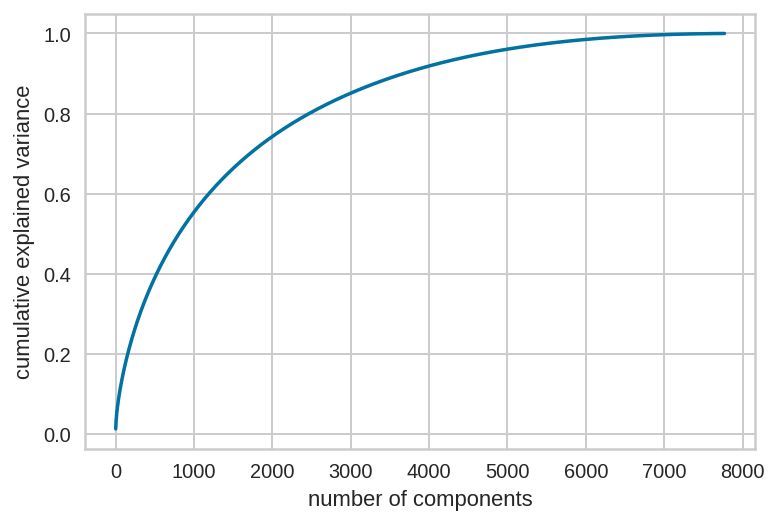

In [209]:
# Explained variance for different number of components

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [210]:
# applying PCA to transform the data into 4000 components selected by checking the above graph . explained variance for 4000 components is around 0.9

pca = PCA(n_components=4000,random_state=42)
pca.fit(x.toarray())
transformed_data = pca.fit_transform(x.toarray())
transformed_data.shape

(7770, 4000)

# **K Means Clustering**

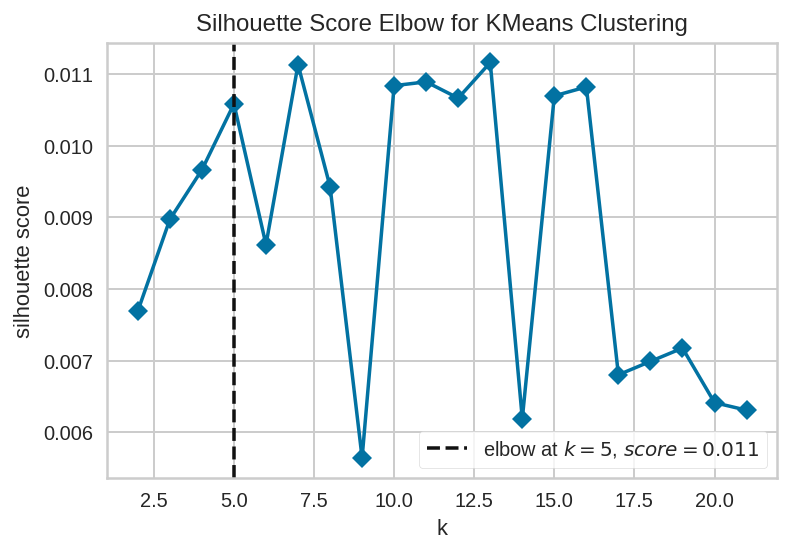

In [211]:
# finding optimal number of clusters for K Means

# Instantiate the clustering model and visualizer
model = KMeans(tol=1e-4,random_state = 42)
visualizer = KElbowVisualizer(model, k=(2,22), metric='silhouette', timings=False)

visualizer.fit(transformed_data)
visualizer.show()

We got the best silhouette score for value of k=5.

In [212]:
# fitting kmeans to transformed data

kmeans= KMeans(n_clusters=5,max_iter=1000,tol=1e-4, n_init=1,random_state= 42)
kmeans.fit(transformed_data)

KMeans(max_iter=1000, n_clusters=5, n_init=1, random_state=42)

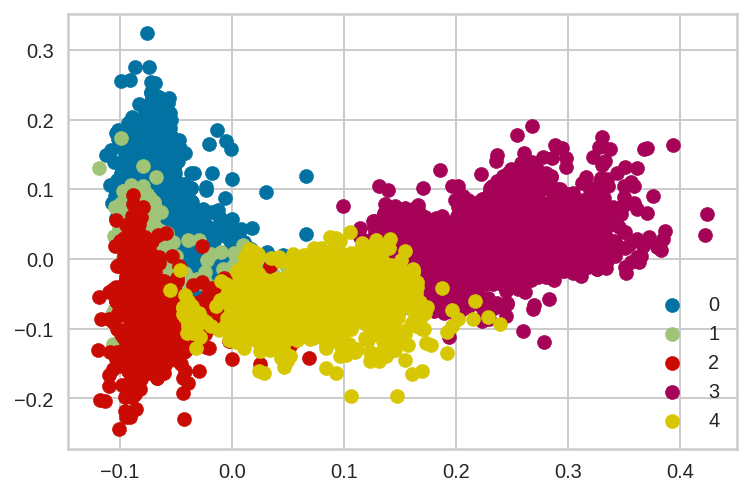

In [213]:
# plotting clusters

label = kmeans.fit_predict(transformed_data)
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(transformed_data[label == i , 0] , transformed_data[label == i , 1] , label = i)
plt.legend()
plt.show()

In [214]:
# created new column with cluster number

Net_df['cluster'] = kmeans.labels_

In [215]:
#top 5 observations
Net_df.head()

,type,title,director,cast,country,release_year,rating,duration,genres,description,year_added,month_added,combined_text,cluster
0,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,international tv shows tv dramas tv scifi fan...,3
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,dramas international movies after a devastatin...,0
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,horror movies international movies when an arm...,0
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,action adventure independent movies scifi fa...,1
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,dramas a brilliant group of students become ca...,0


In [216]:
# value count for different clusters

Net_df.cluster.value_counts()

0    3304
2    1391
3    1179
4    1129
1     767
Name: cluster, dtype: int64

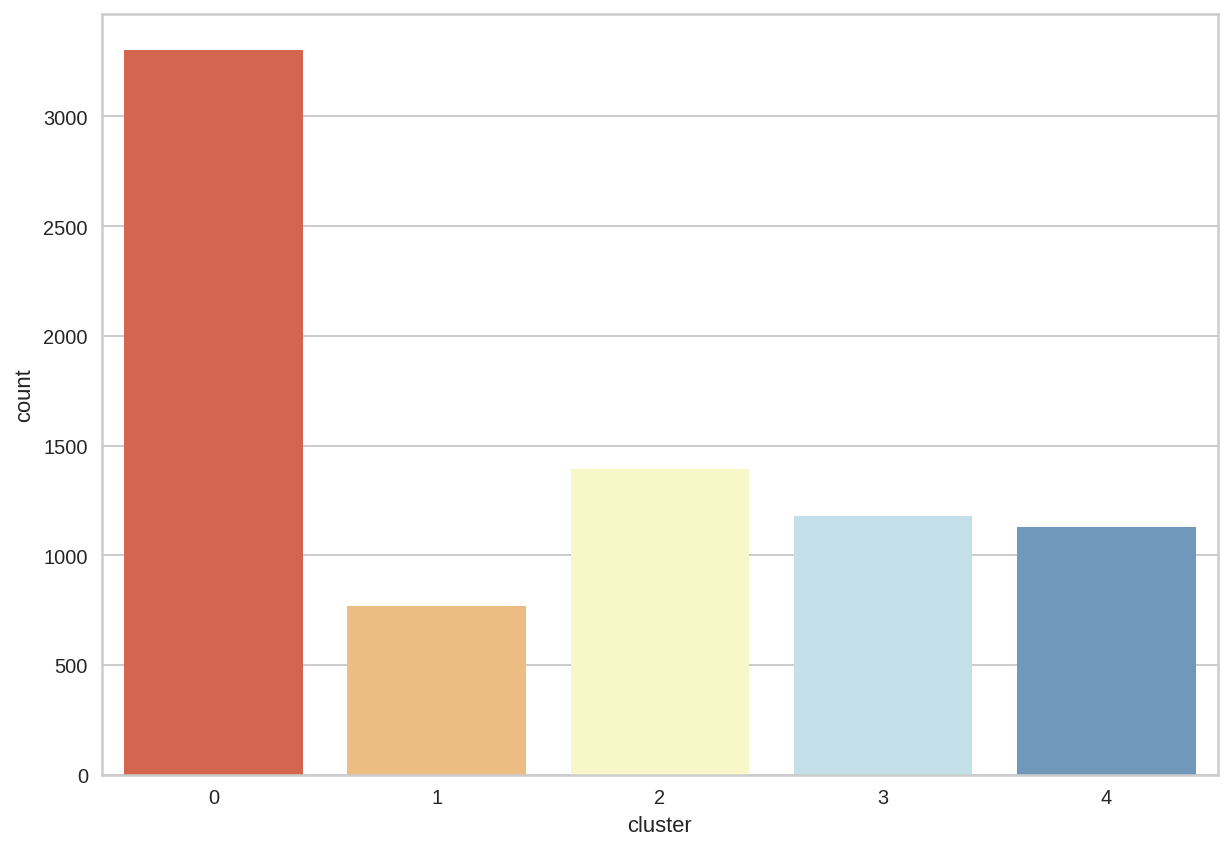

In [217]:
# Size of clusters formed
plt.figure(figsize=(10,7))
sns.countplot(x =Net_df['cluster'], data = Net_df , palette="RdYlBu", )

From above graph we can infer that cluster #3 contains most amount of data followed by cluster #0.

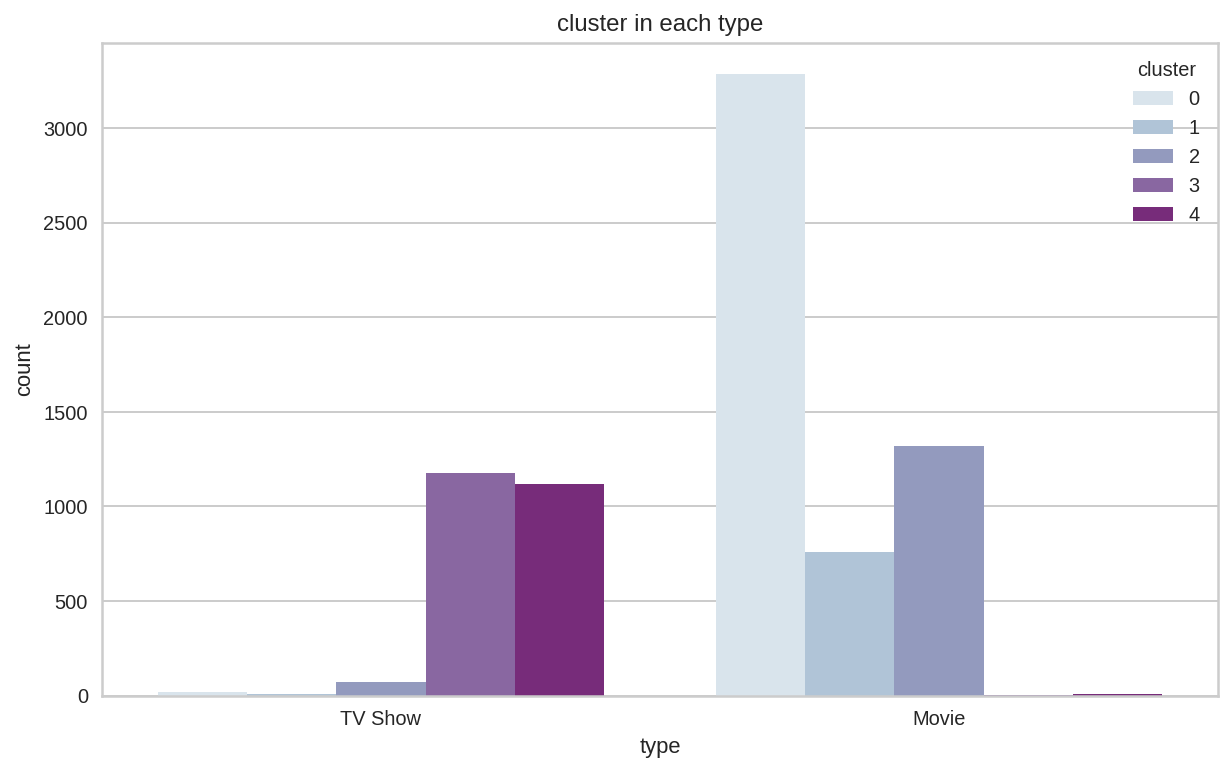

In [218]:
# plot for cluster in each type
plt.figure(figsize=(10,6))
sns.countplot(x=Net_df['type'],palette="BuPu",hue=Net_df['cluster'])
plt.title("cluster in each type")
plt.show()



*   Cluster #3 contains most data on movies while cluster #2 contains least/none.
*    Cluster #2 contains most data on TV shows while cluster #0 contains least/none .



# **Conclusion**

- The Netflix has been increasingly focusing on TV show rather than movies in recent year, as  we observed in year 2020 with decline in growth of movies while  the growth of TV shows  remains the same.
- USA and India are two countries producing the maximum number of content.
- International movies, Drama and Comedy are top genre on Netflix platform. Further we found number of movies on Netflix outnumbers TV-shows.
- Most TV shows end by 1st season and duration of Most movies on Netflix is in 75-120 mins range.
- We Performed K-Means Clustering to create clusters and used silhouette score and elbow curve to find optimal number of clusters k=5.
- We've defined 5 clusters and implemented the KMEANS clustering algorithm. And then we determined that cluster number 3 covers most data than any other.
